**Lab2-DL: B2-læring-i-nn.ipynb** (ELMED219) | Prioritet: 1 (kjerne)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/arvidl/ELMED219-2026/blob/main/Lab2-DL/notebooks/B2-læring-i-nn.ipynb)

# 🎓 B2: Læring i Nevrale Nettverk

**Fra Biologi til Kunstig Intelligens: Hvordan Nevrale Nettverk Lærer**

---

## 🎯 Mål for denne delen

I denne notebooken skal vi:
- **Forstå** hvordan læring skjer i biologiske nevrale nettverk
- **Sammenligne** biologisk og kunstig læring
- **Utforske** backpropagation og gradient descent
- **Implementere** trening, validering og testing
- **Se** på overtilpasning og generalisering
- **Bruke** PyTorch for praktiske eksempler

---

## 🧠 1. Biologisk Fundament: Hvordan Lærer Hjernen?

Før vi utforsker kunstige nevrale nettverk, er det viktig å forstå hvordan læring skjer i biologiske nevrale nettverk - hjernen vår.

### Nevroplastisitet: Hjernens Læringsmekanisme

**Nevroplastisitet** er hjernens evne til å endre seg gjennom hele livet. Dette er grunnlaget for all læring og minne.

#### Typer Nevroplastisitet

1. **Synaptisk Plastisitet**
   - Endring i styrken på synapser mellom nevroner
   - **LTP (Long-Term Potentiation)**: Synapser blir sterkere ved gjentatt stimulering
   - **LTD (Long-Term Depression)**: Synapser blir svakere ved mangel på stimulering

2. **Strukturell Plastisitet**
   - Dannelse av nye synapser (synaptogenese)
   - Vekst av nye dendritter og aksoner
   - Dannelse av nye nevroner (neurogenese) i visse områder

3. **Funksjonell Plastisitet**
   - Endring i hvordan nevroner responderer på stimuli
   - Reorganisering av nevrale kretser

### Hebb's Regel: "Nevroner som fyrer sammen, kobles sammen"

**Donald Hebb (1949)** formulerte grunnprinsippet for nevroplastisitet:

> "When an axon of cell A is near enough to excite cell B and repeatedly or persistently takes part in firing it, some growth process or metabolic change takes place in one or both cells such that A's efficiency, as one of the cells firing B, is increased."

**Praktisk betydning**: Synapser blir sterkere når pre- og postsynaptiske nevroner aktiveres samtidig.

### Molekylære Mekanismer for Læring

#### 1. **NMDA-reseptorer og Calcium**
- NMDA-reseptorer aktiveres ved samtidig glutamat-binding og depolarisering
- Calcium-ioner strømmer inn og aktiverer signalveier
- Dette fører til LTP og synaptisk forsterkning

#### 2. **Protein Syntese**
- Calcium aktiverer cAMP-response element binding protein (CREB)
- CREB regulerer genuttrykk for proteiner viktige for synaptisk funksjon
- Nye proteiner endrer synapsens struktur og funksjon

#### 3. **BDNF (Brain-Derived Neurotrophic Factor)**
- Vekstfaktor som fremmer nevronal overlevelse og synaptogenese
- Økt uttrykk ved læring og trening
- Viktig for langtidsminne og nevroplastisitet

### Læring på Systemnivå

#### 1. **Korttidshukommelse**
- Aktivering av nevrale kretser i hippocampus og prefrontalcortex
- Krever kontinuerlig aktivitet for å opprettholdes
- Kapasitet: ~7±2 elementer (Miller's Magic Number)<br>
   - Miller, G. A. (1956). The magical number seven, plus or minus two: Some limits on our capacity for processing information. [[link](https://psychclassics.yorku.ca/Miller)]

#### 2. **Langtidshukommelse**
- Konsolidering gjennom protein syntese
- Reorganisering fra hippocampus til neocortex
- Kan vare livet ut

#### 3. **Prosedyrlæring**
- Basalganglier og cerebellum
- Automatisering av motoriske og kognitive ferdigheter
- "Muscle memory" - automatiske responser

### Klinisk Relevans

#### **Rehabilitering etter hjerneskade**
- Nevroplastisitet muliggjør kompensasjon og gjenoppretting av funksjon
- Tidlig intervensjon er kritisk
- Repetitiv trening fremmer reorganisering

#### **Alderdom og kognitiv svikt**
- Nevroplastisitet reduseres med alder
- Men kan fremmes gjennom:
  - Fysisk aktivitet
  - Mental stimulering
  - Sosial interaksjon
  - Ny læring

#### **Psykiske lidelser**
- Depresjon: Redusert neurogenese og synaptisk plastisitet
- PTSD: Forstyrret konsolidering av traumatiske minner
- Schizofreni: Endringer i synaptisk funksjon og nevroplastisitet

#### Sammenligning: Biologisk vs Kunstig Læring

| Aspekt | Biologisk (Hjernen) | Kunstig (Neurale Nettverk) |
|--------|-------------------|---------------------------|
| **Læringsmekanisme** | Synaptisk plastisitet | Gradient descent |
| **Tidsskala** | Millisekunder til år | Sekunder til timer |
| **Energiforbruk** | ~20W (hele hjernen) | Varierer kraftig - ved trening av modeller fra 100 W (små forskningsmodeller) til megawatt (de største modellene) |
| **Robusthet** | Høyt toleranse for feil | Kan være følsom |
| **Adaptabilitet** | Kontinuerlig læring | Ofte batch-læring |
| **Forklarbarhet** | Kompleks, delvis forstått | Matematisk presis |
| **Kreativitet** | Høy kreativitet | Begrenset |
| **Generaliseringsgrad** | Utmerket | Varierer |



### **Forsterket Læring**: Belønning og Straff i Hjernen

**Forsterket læring** (reinforcement learning, **RL**) er en fundamental læringsmekanisme som finnes både i biologiske og kunstige systemer. I hjernen skjer dette gjennom dopaminerge systemer som belønner ønsket oppførsel.

#### Biologiske Mekanismer for Forsterket Læring

**1. Dopaminerge Systemer**
- **Ventral Tegmental Area (VTA)** og **Substantia Nigra** produserer dopamin
- **Nucleus Accumbens** mottar dopamin og koder for belønning
- **Prefrontal Cortex** integrerer belønningsinformasjon for beslutningstaking

**2. Belønningsprediksjon og Feil**
- **Dopamin-nivåer** reflekterer forskjellen mellom forventet belønning og faktisk belønning
- **Positive feil**: Høyere belønning enn forventet → Økt dopamin
- **Negative feil**: Lavere belønning enn forventet → Redusert dopamin

**3. Temporal Difference Learning**
- Hjernen lærer å forutsi fremtidige belønninger
- **Immediate reward**: Umiddelbar belønning
- **Delayed reward**: Belønning som kommer senere
- **Discounting**: Fremtidige belønninger vektes lavere


Her er en mer presis formulering av belønningsprediksjon og feil:

**Belønningsprediksjon og Feil**

**Dopamin-nivåer** reflekterer forskjellen mellom forventet og faktisk belønning:

$\Delta R(t) = R(t) - \hat{R}(t)$

Hvor:
- $\Delta R(t)$ = belønningsfeil (reward prediction error)
- $R(t)$ = faktisk belønning ved tid $t$
- $\hat{R}(t)$ = forventet belønning ved tid $t$

**Dopamin-respons** er proporsjonal med belønningsfeilen:

$DA(t) \propto \Delta R(t)$

**Positive feil** (høyere belønning enn forventet):

$\Delta R(t) > 0 \Rightarrow DA(t) > 0 \text{ (økt dopamin)}$

**Negative feil** (lavere belønning enn forventet):

$\Delta R(t) < 0 \Rightarrow DA(t) < 0 \text{ (redusert dopamin)}$

**Temporal Difference Learning**:

$\Delta R(t) = R(t) + \gamma \hat{V}(s_{t+1}) - \hat{V}(s_t)$

Hvor:
- $\gamma$ = diskonteringsfaktor (0 < γ ≤ 1)
- $\hat{V}(s_t)$ = forventet verdi av tilstand $s_t$*****

Dette er kjernen i **Temporal Difference (TD) learning** som er grunnlaget for både biologisk og kunstig forsterket læring.


#### Klinisk Relevans for Helse

**1. Avhengighet og Belønningssystemer**
- **Substansmisbruk** kaprer naturlige belønningssystemer
- **Toleranse**: Økt behov for stimulus for samme belønningsfølelse
- **Avhengighet**: Kompulsiv oppførsel til tross for negative konsekvenser

**2. Læring og Rehabilitering**
- **Positiv forsterkning** fremmer ønsket oppførsel
- **Negativ forsterkning** reduserer uønsket oppførsel
- **Shaping**: Gradvis tilnærming til målferdigheter

**3. Klinisk Anvendelse**
- **Kognitiv atferdsterapi (CBT)**: Bruker prinsipper for forsterket læring
- **Motivasjonelle intervjuer**: Forsterker endringsorientert oppførsel
- **Gamification**: Bruker belønningssystemer i behandling

#### Sammenligning: Hjernen vs. Kunstig Forsterket Læring

| Aspekt | Biologisk (Hjernen) | Kunstig (RL) |
|--------|-------------------|--------------|
| **Belønningssignal** | Dopamin | Numerisk reward |
| **Tidsskala** | Millisekunder | Diskret/episodisk |
| **Eksplorering** | Nysgjerrighet, nyskapende | Epsilon-greedy******, UCB****** |
| **Minne** | Hippocampus + Neocortex | Experience replay |
| **Generalisering** | Høy | Avhenger av representasjon |
| **Kreativitet** | Høy | Begrenset |

**Viktig for Helsepersonell:**
- Forstå at **motivasjon** og **belønning** er fundamentale læringsmekanismer
- **AI-systemer** kan bruke liknende prinsipper for å lære optimal oppførsel
- **Klinisk relevans** for behandling av avhengighet og atferdsendring


**(*)** Hva menes med tilstand $s_t$ ?

"Tilstand $s_t$" representerer forskjellige ting i hjernen versus AI, men begge har samme grunnleggende funksjon.

### I Hjernen (Biologisk)

**Tilstand $s_t$** representerer den **nevrale aktivitetstilstanden** i relevante hjerneområder:

#### Eksempler på tilstander:
- **Sensorisk tilstand**: "Jeg ser mat" (visuell cortex aktivitet)
- **Motivasjonell tilstand**: "Jeg er sulten" (hypothalamus aktivitet)
- **Spatial tilstand**: "Jeg er i kjøkkenet" (hippocampus sted-celler)
- **Emosjonell tilstand**: "Jeg føler meg glad" (limbisk system aktivitet)
- **Motorisk tilstand**: "Jeg rekker ut hånden" (motor-cortex aktivitet)

#### Konkret eksempel:
Når du lærer å finne mat i kjøkkenet:
- $s_t$ = "Jeg står i kjøkkenet og ser kjøleskapet"
- $s_{t+1}$ = "Jeg har åpnet kjøleskapet og ser mat"
- $\hat{V}(s_t)$ = "Hvor mye belønning forventer jeg fra denne situasjonen?"

### I AI (Kunstig)

**Tilstand $s_t$** representerer den **digitale representasjonen** av miljøet:

#### Eksempler på tilstander:
- **Spill**: "Spilleren er på posisjon (x,y) med 3 liv igjen"
- **Robot**: "Roboten er 2 meter fra målet, peker nord, har 50% batteri"
- **Medisinsk AI**: "Pasient har temperatur 38.5°C, puls 90, blodtrykk 140/90"
- **Finansiell AI**: "Aksjekurs er 850 kr, volum er 500.000, RSI (Relativ Styrke Indeks) er 65" <br>
       (e.g., "Equinor-aksjen har steget 2% i dag, handelsvolumet er over gjennomsnittet")

#### Konkret eksempel:
En AI som lærer å spille Pac-Man:
- $s_t$ = "Pac-Man er på posisjon (10,5), spøkelse på posisjon (8,3), 3 prikker igjen"
- $s_{t+1}$ = "Pac-Man spiste en prikk, nå 2 prikker igjen"
- $\hat{V}(s_t)$ = "Hvor mange poeng forventer AI-en fra denne posisjonen?"

### Sammenligning

| Aspekt | Hjernen | AI |
|--------|---------|-----|
| **Representasjon** | Nevral aktivitet | Numeriske verdier |
| **Kompleksitet** | ~86 milliarder nevroner | Begrenset av beregningskraft |
| **Kontinuerlig** | Analog, flytende | Ofte diskret |
| **Kontekst** | Rik, multimodal | Avhengig av sensorer |
| **Minne** | Hippocampus + Neocortex | Experience replay buffer**#** |

### Klinisk Relevans

**For helsepersonell** er dette viktig fordi:

1. **Pasienttilstander**: AI kan lære å forutsi utfall basert på pasientdata
2. **Behandlingsvalg**: Systemer kan lære optimal behandling for ulike tilstander
3. **Diagnostikk**: AI kan gjenkjenne mønstre i pasienttilstander

**Eksempel**: En AI som lærer å dosere insulin:
- $s_t$ = "Blodsukker: 180 mg/dL, tid: 14:00, siste måltid: 2 timer siden"
- $\hat{V}(s_t)$ = "Forventet belønning (stabil blodsukker) fra denne tilstanden"
- AI lærer å forutsi hvilke doser som gir best resultat for ulike tilstander

Tilstanden er altså en "snapshot" av situasjonen som systemet bruker for å ta beslutninger og lære fra resultatene.

**(#)** Hva er "Experience replay buffer"?


**Experience Replay Buffer** (erfaringsgjenbruk) er en viktig teknikk i forsterket læring som hjelper AI-systemer å lære mer effektivt ved å lagre og gjenbruke tidligere opplevelser.

#### Hva er det?

Experience Replay Buffer er en **datastruktur** som lagrer:
- **Tilstand** ($s_t$): Hva som skjedde
- **Handling** ($a_t$): Hva AI-en gjorde
- **Belønning** ($r_t$): Hvor bra det gikk
- **Neste tilstand** ($s_{t+1}$): Hva som skjedde etterpå

#### Hvordan fungerer det?

##### 1. **Lagring**:
```
Buffer = [(s₁, a₁, r₁, s₂), (s₂, a₂, r₂, s₃), (s₃, a₃, r₃, s₄), ...]
```

##### 2. **Trening**:
- I stedet for å lære bare fra siste opplevelse
- AI-en velger **tilfeldige** opplevelser fra bufferen
- Dette bryter korrelasjonen mellom påfølgende opplevelser

##### 3. **Fordeler**:
- **Stabilisering**: Reduserer variasjon i læring
- **Efektivitet**: Gjenbruker tidligere data
- **Diversitet**: Lærer fra mange forskjellige situasjoner

#### Praktisk eksempel:

**En AI som lærer å spille et spill**:
- **Buffer**: Lagrer 10.000 tidligere spillrunder
- **Trening**: Velger tilfeldig 32 opplevelser fra bufferen
- **Læring**: Bruker disse til å oppdatere strategien

#### Sammenligning med Biologisk Minne

| Aspekt | Experience Replay | Hjernen |
|--------|------------------|---------|
| **Lagring** | Digital buffer | Hippocampus + Neocortex |
| **Tilgang** | Tilfeldig sampling | Assosiativ gjenkalling |
| **Kapasitet** | Begrenset størrelse | Praktisk ubegrenset |
| **Konsolidering** | Ingen | Langtidshukommelse |
| **Emosjoner** | Ingen | Sterk påvirkning |

#### Klinisk Relevans

**For helsepersonell** er dette relevant fordi:

##### 1. **Medisinske AI-systemer**:
- **Diagnostikk**: Lærer fra tusenvis av pasienttilfeller
- **Behandling**: Bruker erfaring fra liknende pasienter
- **Prediksjon**: Forutser utfall basert på historiske data

##### 2. **Klinisk beslutningstaking**:
- **Pattern recognition**: Gjenkjenner mønstre i pasientdata
- **Risk assessment**: Vurderer risiko basert på tidligere tilfeller
- **Treatment optimization**: Finner beste behandling basert på erfaring

##### 3. **Eksempel i praksis**:
En AI som lærer å diagnostisere hjerteinfarkt:
- **Buffer**: Lagrer 50.000 pasienttilfeller med EKG, symptomer, og diagnose
- **Trening**: Velger tilfeldig 100 tilfeller for hver treningsrunde
- **Læring**: Forbedrer diagnostisk nøyaktighet over tid

**Viktig poeng**: Experience Replay, inspirert fra menneskelig læring,  hjelper AI-en å lære ved å "reflektere" over tidligere erfaringer og trekke lærdommer fra dem, i stedet for bare å reagere på det som skjer akkurat nå.


**(**)** Hva betyr **Epsilon-greedy** og **UCB** i konteksten av forsterket læring (reinforcement learning? 

Dette er algoritmer som brukes for å balansere mellom **eksplorering** (undersøkelse) og **eksploitering** (utnyttelse) i AI-systemer.

#### Epsilon-greedy (ε-greedy)

**Epsilon-greedy** er en enkel men effektiv strategi for å håndtere **eksplorering vs eksploitering**-dilemmaet:

##### Hvordan det fungerer:
- **Eksploitering (1-ε)**: Velg den handlingen som for øyeblikket ser best ut (høyest forventet belønning)
- **Eksplorering (ε)**: Velg en tilfeldig handling for å utforske nye muligheter

##### Eksempel:
- Hvis ε = 0.1 (10%), vil systemet:
  - 90% av tiden velge den beste kjente handlingen
  - 10% av tiden velge en tilfeldig handling

##### Praktisk eksempel:
En AI som lærer å spille et spill:
- **Eksploitering**: Bruk den strategien som har gitt best resultat så langt
- **Eksplorering**: Prøv en ny strategi for å se om den kan være enda bedre

#### UCB (Upper Confidence Bound)

**UCB** er en mer sofistikert strategi som bruker statistisk teori for å balansere eksplorering og eksploitering:

##### Hvordan det fungerer:
UCB velger handlingen med høyest **"upper confidence bound"** - en kombinasjon av:
1. **Forventet belønning** (eksploitering)
2. **Usikkerhet** (eksplorering)

##### Formelen:
```
UCB(a) = Q(a) + c × √(ln(t) / N(a))
```

Hvor:
- `Q(a)` = gjennomsnittlig belønning for handling a
- `c` = konfidensnivå (hvor mye eksplorering)
- `t` = totalt antall forsøk
- `N(a)` = antall ganger handling a har blitt prøvd

##### Praktisk eksempel:
En AI som lærer å velge mellom forskjellige behandlingsmetoder:
- **Høy Q(a)**: Behandling som har gitt gode resultater
- **Høy usikkerhet**: Behandling som ikke er prøvd så ofte
- **UCB velger**: Behandling med best kombinasjon av godt resultat og høy usikkerhet

#### Sammenligning med Biologisk Læring

| Aspekt | Biologisk (Hjernen) | Epsilon-greedy | UCB |
|--------|-------------------|----------------|-----|
| **Eksplorering** | Nysgjerrighet, spontan aktivitet | Tilfeldig valg | Statistisk usikkerhet |
| **Eksploitering** | Gjentakelse av vellykkede handlinger | Beste kjente handling | Høyest forventet belønning |
| **Adaptabilitet** | Dynamisk basert på kontekst | Fast ε-verdi | Dynamisk basert på usikkerhet |
| **Kompleksitet** | Høy (mange faktorer) | Lav | Medium |

#### Klinisk Relevans

**For helsepersonell** er dette relevant fordi:

1. **Behandlingsvalg**: AI-systemer kan bruke disse strategiene for å lære optimal behandling
2. **Kliniske forsøk**: Prinsippene ligner på adaptive kliniske forsøk
3. **Personlig medisin**: Systemer kan lære individuelt optimale behandlinger

**Eksempel i praksis**:
- En AI som lærer å dosere medisin kan bruke UCB for å balansere mellom å bruke doser som har fungert godt og å prøve nye doser for å finne enda bedre alternativer.

Disse algoritmene hjelper AI-systemer å lære på en måte som ligner på hvordan mennesker balanserer mellom å bruke det vi vet fungerer og å utforske nye muligheter.

---

##  🤖 2. Fra Biologi til Kunstig Intelligens

Nå som vi har fått innblikk i biologisk læring, kan vi se hvordan kunstige nevrale nettverk inspirert av hjernen fungerer.

### Teoretisk Fundament

### Hvordan Lærer et Kunstig Nevralt Nettverk?

Læring i kunstige nevrale nettverk skjer gjennom **optimalisering** - vi justerer vektene for å minimere feilen:

1. **Fremover-pass**: Beregn prediksjon fra input
2. **Beregn feil**: Sammenlign prediksjon med "sannhet" 
3. **Bakover-pass**: Beregn gradienter (hvordan endre vekter)
4. **Oppdater vekter**: Juster vekter i retning som reduserer feil
5. **Gjenta**: Fortsett til konvergens

### Matematisk Formulering

**Tap-funksjon**: L(θ) = Σ tap(f(xᵢ, θ), yᵢ)

**Gradient Nedstigning**: θ ← θ - α∇L(θ)

### Symboldefinisjoner

**Tap-funksjonen** måler hvor godt modellen vår gjør det:

- **L(θ)** = Total tap for modellen med parametere θ
- **Σ** = Sum over alle eksempler i treningssettet
- **tap()** = Tap-funksjon som måler feil for ett eksempel
- **f(xᵢ, θ)** = Modellens prediksjon for input xᵢ med parametere θ
- **xᵢ** = Input-eksempel nummer i (f.eks. pasientdata)
- **yᵢ** = Sann verdi for eksempel i (f.eks. diagnose)
- **θ** = Alle modellparametere (vekter og bias)

**Gradient Nedstigning** oppdaterer parametrene:

- **α** = Læringsrate (hvor store steg vi tar)
- **∇L(θ)** = Gradient av tap-funksjonen (retning for endring)
- **←** = Oppdatering (ny verdi blir til venstre side)

### Eksempler på Tap-funksjoner ("Loss function")

Tap-funksjonen **tap()** måler hvor feil modellens prediksjon er. Her er vanlige eksempler:

#### 1. **Mean Squared Error (MSE)** - For Regresjon
```
tap(y_true, y_pred) = (y_true - y_pred)²
```
**Medisinsk eksempel**: Prediksjon av blodtrykk
- Hvis sann verdi er 120 mmHg og modellen predikerer 125 mmHg
- Tap = (120 - 125)² = 25

#### 2. **Cross-Entropy Loss** - For Klassifikasjon
```
tap(y_true, y_pred) = -y_true × log(y_pred)
```
**Medisinsk eksempel**: Diagnose av sykdom (0=frisk, 1=syk)
- Hvis pasient er syk (y_true=1) og modellen predikerer 90% sannsynlighet for sykdom
- Tap = -1 × log(0.9) = 0.105 (lavt tap = god prediksjon)
- Hvis modellen predikerer 10% sannsynlighet for sykdom
- Tap = -1 × log(0.1) = 2.303 (høyt tap = dårlig prediksjon)

#### 3. **Binary Cross-Entropy** - For Binær Klassifikasjon
```
tap(y_true, y_pred) = -[y_true×log(y_pred) + (1-y_true)×log(1-y_pred)]
```
**Medisinsk eksempel**: Prediksjon av hjertinfarkt
- Frisk pasient (y_true=0) med 20% risiko: tap = -[0×log(0.2) + 1×log(0.8)] = 0.223
- Syk pasient (y_true=1) med 80% risiko: tap = -[1×log(0.8) + 0×log(0.2)] = 0.223

#### 4. **Hinge Loss** - For Support Vector Machines
```
tap(y_true, y_pred) = max(0, 1 - y_true × y_pred)
```
**Medisinsk eksempel**: Klassifisering av kreftstadier
- Hvis sann klasse er +1 og modellen predikerer +0.8
- Tap = max(0, 1 - 1×0.8) = max(0, 0.2) = 0.2

#### 5. **Huber Loss** - Robust mot Uteliggere
```
tap(y_true, y_pred) = {
    0.5 × (y_true - y_pred)²     hvis |y_true - y_pred| ≤ δ
    δ × |y_true - y_pred| - 0.5 × δ²  ellers
}
```
**Medisinsk eksempel**: Prediksjon av blodtrykk med uteliggere
- **δ (delta)** = Terskelverdi som bestemmer når vi bytter fra kvadratisk til lineær tap
- **Små feil** (≤ δ): Bruker kvadratisk tap som MSE
- **Store feil** (> δ): Bruker lineær tap som MAE

**Praktisk eksempel** med δ = 10:
- Feil på 5 mmHg: tap = 0.5 × 5² = 12.5 (kvadratisk)
- Feil på 15 mmHg: tap = 10 × 15 - 0.5 × 10² = 100 (lineær)

**Fordeler**:
- **Robust mot uteliggere**: Store feil straffes ikke så hardt som med MSE
- **Glatt overgang**: Kontinuerlig funksjon uten knekk
- **Balanserer MSE og MAE**: Kombinerer beste egenskaper fra begge

### Hvorfor Forskjellige Tap-funksjoner?

- **MSE**: Best for kontinuerlige verdier (blodtrykk, temperatur)
- **Cross-Entropy**: Best for sannsynligheter og klassifikasjon
- **Hinge Loss**: Best for margin-baserte klassifikatorer
- **Huber Loss**: Robust mot uteliggere (kombinerer MSE og MAE)

### Praktisk Betydning

Valg av tap-funksjon påvirker:
- **Hvor raskt** modellen lærer
- **Hvilke feil** som blir mest straffet
- **Robusthet** mot uteliggere i dataene
- **Balansen** mellom falske positive og falske negative


In [2]:
# Importer nødvendige biblioteker
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Sett opp plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🎓 Klar for læring i nevrale nettverk!")
print(f"PyTorch versjon: {torch.__version__}")
print(f"CUDA tilgjengelig: {torch.cuda.is_available()}")
print(f"MPS tilgjengelig: {torch.backends.mps.is_available()}")


🎓 Klar for læring i nevrale nettverk!
PyTorch versjon: 2.5.1+cu121
CUDA tilgjengelig: True
MPS tilgjengelig: False


----

## 3. Gradient Nedstigning: Veien til optimalisering og "motoren" i AI-læring

### Intuisjon: Å Finne Det Laveste Punktet

Tenk deg at du er blindfoldet på en fjelltopp og skal finne dalen. Du kan:
1. **Føle terrenget** rundt deg (beregne gradient)
2. **Gå i retning** som går nedover (oppdater vekter)
3. **Gjenta** til du når bunnen (konvergens)

Dette er nøyaktig det gradient descent gjør!

### Matematisk Forståelse

**Gradient** = retningen med størst stigning
**Gradient Nedstigning** = gå i motsatt retning (nedover)

**θ ← θ - α∇L(θ)**

Hvor:
- **α** (alpha) = læringsrate (stegstørrelse)
- **∇L(θ)** = gradient (retning)
- **-** = gå i motsatt retning


_Visualisering av gradient nedstigning langs én dimensjon_

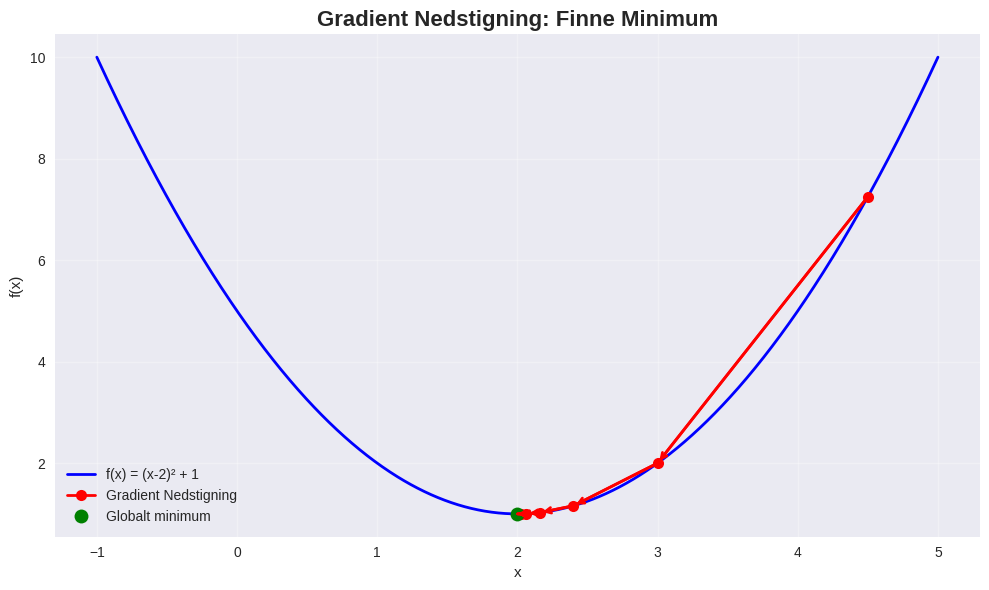

Startpunkt: x = 4.50, f(x) = 7.25
Sluttpunkt: x = 2.00, f(x) = 1.00
Optimalt: x = 2.00, f(x) = 1.00


In [3]:
# Visualiser gradient descent på en enkel funksjon
def visualize_gradient_descent():
    # Definer en enkel funksjon: f(x) = (x-2)² + 1
    x = np.linspace(-1, 5, 1000)
    y = (x - 2)**2 + 1
    
    # Gradient descent simulering
    learning_rate = 0.3
    x_current = 4.5  # Startpunkt
    iterations = 10
    
    x_history = [x_current]
    y_history = [(x_current - 2)**2 + 1]
    
    for i in range(iterations):
        # Beregn gradient: f'(x) = 2(x-2)
        gradient = 2 * (x_current - 2)
        
        # Oppdater x: x = x - α * gradient
        x_current = x_current - learning_rate * gradient
        
        x_history.append(x_current)
        y_history.append((x_current - 2)**2 + 1)
    
    # Plot resultatet
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    ax.plot(x, y, 'b-', linewidth=2, label='f(x) = (x-2)² + 1')
    ax.plot(x_history, y_history, 'ro-', linewidth=2, markersize=8, label='Gradient Nedstigning')
    
    # Legg til piler for å vise retning
    for i in range(len(x_history)-1):
        ax.annotate('', xy=(x_history[i+1], y_history[i+1]), 
                   xytext=(x_history[i], y_history[i]),
                   arrowprops=dict(arrowstyle='->', color='red', lw=2))
    
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.set_title('Gradient Nedstigning: Finne Minimum', fontsize=16, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Marker minimum
    ax.plot(2, 1, 'go', markersize=10, label='Globalt minimum')
    ax.legend()
    
    plt.tight_layout()
    plt.show()
    
    print(f"Startpunkt: x = {x_history[0]:.2f}, f(x) = {y_history[0]:.2f}")
    print(f"Sluttpunkt: x = {x_history[-1]:.2f}, f(x) = {y_history[-1]:.2f}")
    print(f"Optimalt: x = 2.00, f(x) = 1.00")

visualize_gradient_descent()


_3D visualisering av gradient nedstigning i to dimensjoner_

### Gradient Nedstigning i 2D: Fra Fjell til Dal

I virkeligheten har nevrale nettverk tusenvis av parametere, ikke bare én. La oss se hvordan gradient nedstigning fungerer i to dimensjoner:

#### Hva Skjer i 2D?

**Merk**: 2D refererer til parameterrommet: input-dimensjonene (x,y), ikke visualiseringen som er 3D plot av 2D funksjon (høyde z=f(x,y) som tredje dimensjon)


- **Gradient** blir en vektor: ∇f = (∂f/∂x, ∂f/∂y)
- **Retning** viser hvor terrenget stiger mest
- **Størrelse** viser hvor bratt det er
- **Oppdatering**: (x,y) ← (x,y) - α × ∇f

#### Geografisk Analogi

Tenk deg at du er på en fjelltopp og skal finne dalen:
- **Gradient** = retningen med størst stigning
- **Gradient Nedstigning** = gå i motsatt retning
- **Læringsrate** = hvor store steg du tar
- **Minimum** = dalen (optimal løsning)

#### Visualisering

Nedenfor ser du to visualiseringer:
1. **Konturplot**: Som et topografisk kart med høydelinjer
2. **3D Overflate**: Som et faktisk fjell med dal


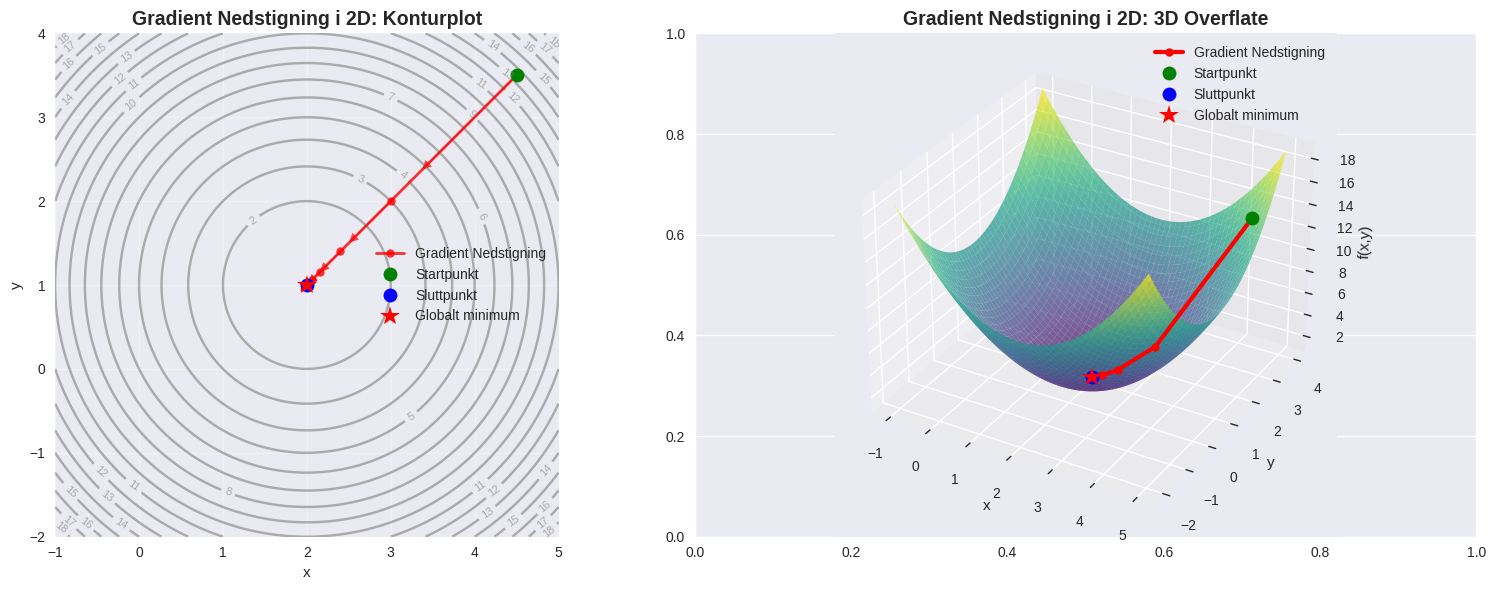

=== Gradient Nedstigning i 2D ===
Startpunkt: (4.50, 3.50), f(x,y) = 13.50
Sluttpunkt: (2.00, 1.00), f(x,y) = 1.00
Optimalt: (2.00, 1.00), f(x,y) = 1.00
Antall iterasjoner: 15
Læringsrate: 0.3


In [4]:
# Visualiser gradient descent i 2D
def visualize_gradient_descent_2d():
    """Visualiser gradient descent på en 2D funksjon"""
    
    # Definer en 2D funksjon: f(x,y) = (x-2)² + (y-1)² + 1
    # Dette har minimum ved (2, 1)
    
    # Lag et grid for plotting
    x = np.linspace(-1, 5, 100)
    y = np.linspace(-2, 4, 100)
    X, Y = np.meshgrid(x, y)
    Z = (X - 2)**2 + (Y - 1)**2 + 1
    
    # Gradient descent simulering
    learning_rate = 0.3
    x_current, y_current = 4.5, 3.5  # Startpunkt
    iterations = 15
    
    # Lagre historie
    x_history = [x_current]
    y_history = [y_current]
    z_history = [(x_current - 2)**2 + (y_current - 1)**2 + 1]
    
    for i in range(iterations):
        # Beregn gradient: ∇f = (2(x-2), 2(y-1))
        grad_x = 2 * (x_current - 2)
        grad_y = 2 * (y_current - 1)
        
        # Oppdater posisjon: (x,y) = (x,y) - α * ∇f
        x_current = x_current - learning_rate * grad_x
        y_current = y_current - learning_rate * grad_y
        
        x_history.append(x_current)
        y_history.append(y_current)
        z_history.append((x_current - 2)**2 + (y_current - 1)**2 + 1)
    
    # Plot resultatet
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot 1: Konturplot med gradient descent
    contour = ax1.contour(X, Y, Z, levels=20, colors='gray', alpha=0.6)
    ax1.clabel(contour, inline=True, fontsize=8)
    
    # Plot gradient descent path
    ax1.plot(x_history, y_history, 'ro-', linewidth=2, markersize=6, 
             label='Gradient Nedstigning', alpha=0.8)
    
    # Legg til piler for å vise retning
    for i in range(len(x_history)-1):
        dx = x_history[i+1] - x_history[i]
        dy = y_history[i+1] - y_history[i]
        ax1.arrow(x_history[i], y_history[i], dx*0.7, dy*0.7, 
                 head_width=0.1, head_length=0.1, fc='red', ec='red', alpha=0.7)
    
    # Marker start og slutt
    ax1.plot(x_history[0], y_history[0], 'go', markersize=10, label='Startpunkt')
    ax1.plot(x_history[-1], y_history[-1], 'bo', markersize=10, label='Sluttpunkt')
    ax1.plot(2, 1, 'r*', markersize=15, label='Globalt minimum')
    
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_title('Gradient Nedstigning i 2D: Konturplot', fontsize=14, fontweight='bold')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.set_aspect('equal')
    
    # Plot 2: 3D overflateplot
    ax2 = fig.add_subplot(122, projection='3d')
    surf = ax2.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7, linewidth=0)
    
    # Plot gradient descent path på overflaten
    z_path = [(x_history[i] - 2)**2 + (y_history[i] - 1)**2 + 1 for i in range(len(x_history))]
    ax2.plot(x_history, y_history, z_path, 'ro-', linewidth=3, markersize=6, 
             label='Gradient Nedstigning')
    
    # Marker start og slutt
    ax2.plot([x_history[0]], [y_history[0]], [z_path[0]], 'go', markersize=10, label='Startpunkt')
    ax2.plot([x_history[-1]], [y_history[-1]], [z_path[-1]], 'bo', markersize=10, label='Sluttpunkt')
    ax2.plot([2], [1], [1], 'r*', markersize=15, label='Globalt minimum')
    
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.set_zlabel('f(x,y)')
    ax2.set_title('Gradient Nedstigning i 2D: 3D Overflate', fontsize=14, fontweight='bold')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print resultater
    print(f"=== Gradient Nedstigning i 2D ===")
    print(f"Startpunkt: ({x_history[0]:.2f}, {y_history[0]:.2f}), f(x,y) = {z_path[0]:.2f}")
    print(f"Sluttpunkt: ({x_history[-1]:.2f}, {y_history[-1]:.2f}), f(x,y) = {z_path[-1]:.2f}")
    print(f"Optimalt: (2.00, 1.00), f(x,y) = 1.00")
    print(f"Antall iterasjoner: {iterations}")
    print(f"Læringsrate: {learning_rate}")

visualize_gradient_descent_2d()


_Visualisering av en mer kompleks flate med illustrasjon av gradient nedstigning_

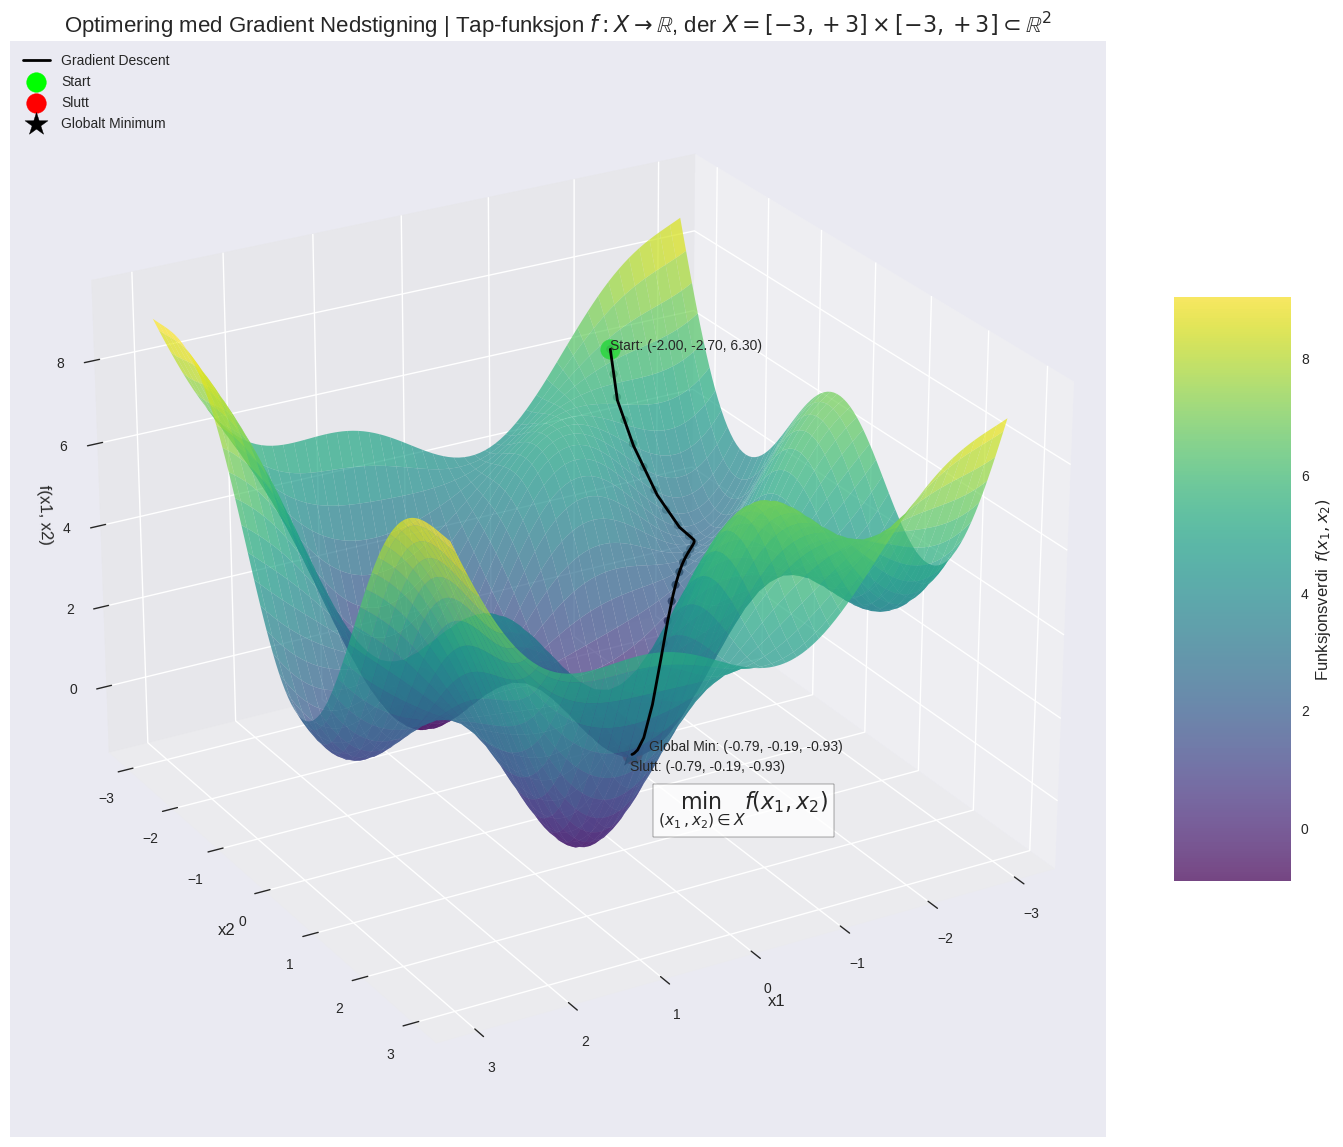


=== Objekt-funksjonen (tap funksjon) ===
f(x₁, x₂) = 0.5(x₁² + x₂²) + 2sin(1.5x₁)cos(1.5x₂) + sin(2x₁)cos(2x₂) + 3e^(-((x₁+1)² + (x₂-1)²)/2)


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize
from scipy.interpolate import interp1d

def objective_function(x):
    x1, x2 = x
    return (0.5 * (x1**2 + x2**2) + 
            2 * np.sin(1.5*x1) * np.cos(1.5*x2) + 
            np.sin(2*x1) * np.cos(2*x2) +
            3 * np.exp(-((x1+1)**2 + (x2-1)**2)/2))

def gradient(x):
    x1, x2 = x
    dx1 = (x1 + 
           3 * np.cos(1.5*x1) * np.cos(1.5*x2) + 
           2 * np.cos(2*x1) * np.cos(2*x2) - 
           3*(x1+1)*np.exp(-((x1+1)**2 + (x2-1)**2)/2))
    dx2 = (x2 - 
           3 * np.sin(1.5*x1) * np.sin(1.5*x2) - 
           2 * np.sin(2*x1) * np.sin(2*x2) - 
           3*(x2-1)*np.exp(-((x1+1)**2 + (x2-1)**2)/2))
    return np.array([dx1, dx2])

# Finn det globale minimum numerisk
result = minimize(objective_function, [0, 0], method='BFGS')
global_min = result.x

# Generer data for overflateplottet
x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = objective_function([X1, X2])

# Opprett figur og 3D-akse
fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(111, projection='3d')

# Plot overflaten
surface = ax.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.7)

# Gradient descent
learning_rate = 0.08  # Justert læringsrate
num_iterations = 60   # Økt antall iterasjoner
start_point = np.array([-2.0, -2.7])
path = [start_point]

for _ in range(num_iterations):
    grad = gradient(path[-1])
    new_point = path[-1] - learning_rate * grad
    path.append(new_point)

path = np.array(path)

# Interpoler banen for å få 25 ekvidistante punkter
cumulative_distances = np.cumsum(np.sqrt(np.sum(np.diff(path, axis=0)**2, axis=1)))
cumulative_distances = np.insert(cumulative_distances, 0, 0)
interpolator = interp1d(cumulative_distances, path, axis=0, kind='linear')
equidistant_distances = np.linspace(0, cumulative_distances[-1], 25)
equidistant_points = interpolator(equidistant_distances)

# Plot gradient descent banen
gd_line = ax.plot(path[:, 0], path[:, 1], objective_function(path.T), 'k-', linewidth=2, label='Gradient Descent')[0]
gd_line.set_zorder(10)

# Plot ekvidistante punkter
equidistant_z = objective_function(equidistant_points.T)
ax.scatter(equidistant_points[:, 0], equidistant_points[:, 1], equidistant_z, color='black', s=30, zorder=12)

# Marker start- og sluttpunkt
start_z = objective_function(path[0])
end_z = objective_function(path[-1])
start_point = ax.scatter(path[0, 0], path[0, 1], start_z, color='lime', s=200, label='Start', zorder=11)
end_point = ax.scatter(path[-1, 0], path[-1, 1], end_z, color='red', s=200, label='Slutt', zorder=11)

# Marker globalt minimum
global_min_z = objective_function(global_min)
global_min_point = ax.scatter(global_min[0], global_min[1], global_min_z, color='black', s=300, marker='*', label='Globalt Minimum', zorder=11)

# Legg til koordinater som tekst
ax.text(path[0, 0], path[0, 1], start_z, f'Start: ({path[0, 0]:.2f}, {path[0, 1]:.2f}, {start_z:.2f})', fontsize=10, zorder=11)
ax.text(path[-1, 0]+0.2, path[-1, 1]+0.3, end_z, f'Slutt: ({path[-1, 0]:.2f}, {path[-1, 1]:.2f}, {end_z:.2f})', fontsize=10, zorder=11)
ax.text(global_min[0]-0.2, global_min[1], global_min_z, f'Global Min: ({global_min[0]:.2f}, {global_min[1]:.2f}, {global_min_z:.2f})', fontsize=10, zorder=11)

# Legg til tekstboks for å forklare optimeringsproblemet
ax.text(global_min[0]-0.2, global_min[1]+0.2, global_min_z-1.3, r'$\min_{(x_1,x_2) \in X} f(x_1,x_2)$', fontsize=16, bbox=dict(facecolor='white', alpha=0.8))

# Legg til tittel og etiketter
ax.set_title('Optimering med Gradient Nedstigning | Tap-funksjon $f: X \\rightarrow \\mathbb{R}$, der $X = [-3,+3] \\times [-3,+3] \\subset \\mathbb{R}^2$', fontsize=16)
ax.set_xlabel('x1', fontsize=12)
ax.set_ylabel('x2', fontsize=12)
ax.set_zlabel('f(x1, x2)', fontsize=12)

# Legg til fargelinjen
cbar = fig.colorbar(surface, shrink=0.5, aspect=5)
cbar.set_label('Funksjonsverdi $ \, f(x_1,x_2)$', fontsize=12)

ax.legend(fontsize=10, loc='upper left')

# Roter figuren for bedre visning
ax.view_init(elev=25, azim=60)

plt.tight_layout()

# Skriv figuren til en png-fil kalt graf-for-illustrasjon-av-optimering-3D.png
plt.savefig('./ressurser//graf-for-illustrasjon-av-optimering-3D.png', dpi=300)

plt.show()

# Vis objekt-funksjonen i LaTeX-format
print("\n=== Objekt-funksjonen (tap funksjon) ===")
print("f(x₁, x₂) = 0.5(x₁² + x₂²) + 2sin(1.5x₁)cos(1.5x₂) + sin(2x₁)cos(2x₂) + 3e^(-((x₁+1)² + (x₂-1)²)/2)")


LaTeX-formatering:

$f: X \rightarrow \mathbb{R}$, der $X = [-3,+3] \times [-3,+3] \subset \mathbb{R}^2$  og  $(x_1, x_2) \mapsto \frac{1}{2}(x_1^2 + x_2^2) + 2\sin(1.5x_1)\cos(1.5x_2) + \sin(2x_1)\cos(2x_2) + 3e^{-\frac{(x_1+1)^2 + (x_2-1)^2}{2}}$


-----


## 4. Backpropagation: Hvordan Gradienter Beregnes (Bakover-propagering av Feil)

### Historisk Utvikling av Backpropagation

#### - De Tidlige Årene (1940-1960)

**Warren McCulloch og Walter Pitts (1943)**
- Første matematiske modell av nevroner
- Viste at nevrale nettverk kan beregne logiske funksjoner
- Grunnlaget for moderne nevrale nettverk

**Frank Rosenblatt (1957)**
- Utviklet Perceptron-algoritmen
- Kunne lære enkle klassifikasjonsoppgaver
- **Begrensning**: Kun lineært separerbare problemer

#### - Gjennombruddet (1960-1980)

**Paul Werbos (1974)**
- Første som beskrev backpropagation-algoritmen
- Doktorgradsarbeid ved Harvard University
- **Problemet**: Arbeidet ble ikke anerkjent på den tiden

**David Rumelhart, Geoffrey Hinton og Ronald Williams (1986)**
- Gjenoppdaget og populariserte backpropagation
- Publiserte i Nature - "Learning representations by back-propagating errors"
- **Gjennombrudd**: Viste at algoritmen kunne løse komplekse problemer

#### - Moderne Utvikling (1980-2020)

**Yann LeCun (1980-1990)**
- Utviklet Convolutional Neural Networks (CNN)
- Backpropagation for bildebehandling
- **Praktisk anvendelse**: Håndskrift-gjenkjenning

**Geoffrey Hinton og Deep Learning (2000-2010)**
- Viste at dype nettverk kunne lære
- Backpropagation med mange lag
- **Gjennombrudd**: ImageNet-konkurransen (2012)

### Backpropagation i Biologiske Systemer?

#### Kort Svar: **NEI, men...**

Det er **ikke** holdepunkter for at backpropagation, som vi kjenner den fra AI, brukes i biologiske systemer, men det finnes relaterte mekanismer.

#### Hvorfor Ikke i Biologien?

**1. Matematiske Krav**
- Krever **kontinuerlig deriverbarhet** av alle funksjoner
- Biologiske systemer er **diskret** og **stokastiske**
- **Synapser** kan ikke "beregne deriverte"

**2. Informasjonsflyt**
- Backpropagation krever **feil-signaler** som sendes bakover
- Biologiske nevroner sender  **forward-signaler**
- **Ingen direkte "backward-pass"** i hjernen

**3. Tidsaspekt**
- Backpropagation krever **synkronisert** beregning
- Biologiske systemer er **asynkrone** og **parallell**
- **Tidsskala** er helt forskjellig

#### Hva Bruker Hjernen I Stedet?

**1. Synaptisk Plastisitet**
- **Hebb's regel**: "Nevroner som fyrer sammen, kobles sammen"
- **LTP/LTD**: Synapser forsterkes/svekkes basert på aktivitet
- **Spike-timing dependent plasticity (STDP)**

**2. Lokal Læring**
- Hver synapse lærer **uavhengig** av andre
- **Ingen global koordinering** som backpropagation
- **Dopamin** og andre signalstoffer som "belønning"

**3. Konkurranse og Seleksjon**
- **Neural Darwinism**: Sterke forbindelser overlever
- **Pruning**: Svake forbindelser fjernes
- **Neurogenese**: Nye nevroner dannes

#### Moderne Forskning: Biologisk Inspirerte Algoritmer

**1. Feedback Alignment (2016)**
- Bruker **tilfeldige** feedback-vekter
- **Ikke** den samme algoritmen, men inspirert av biologien
- Viser at eksakt backpropagation ikke er nødvendig

**2. Target Propagation**
- Bruker **målrettede** signaler i stedet for gradienter
- Mer biologisk plausibel
- **Forskningsområde**: Hvordan kan hjernen lære uten backpropagation?

**3. Spiking Neural Networks**
- Modellerer **spike-baserte** nevroner
- Mer realistisk biologisk modell
- **Utfordring**: Vanskelig å trene

#### Klinisk Relevans

**Hvorfor Dette er Viktig for Helsepersonell:**

1. **Forståelse av AI-grenser**
   - AI er **ikke** en kopi av hjernen
   - **Forskjellige** læringsmekanismer
   - **Komplementære** til menneskelig intelligens

2. **Fremtidige Utviklinger**
   - **Biologisk inspirerte** algoritmer kan være bedre
   - **Mer robuste** og **energieffektive** systemer
   - **Bedre** for applikasjoner innen medisin og helse

3. **Etiske Implikasjoner**
   - AI er **ikke** menneskelig intelligens
   - **Forskjellige** styrker og svakheter
   - **Viktig** for klinisk beslutningstaking

#### Konklusjon

Backpropagation er en **kunstig** algoritme som ikke finnes i biologien, men:

- **Inspirert** av biologiske prinsipper
- **Komplementær** til biologisk læring
- **Viktig** for å forstå AI-grenser
- **Relevant** for fremtidige medisinske applikasjoner

**For medisinere og helserbeidere**: Dette hjelper å forstå at AI er et **verktøy**, ikke en erstatning for menneskelig klinisk vurdering.


### 2. Backpropagation: Hvordan Gradienter Beregnes

#### Hva er Backpropagation?

**Backpropagation** (bakover-propagering) er algoritmen som lar nevrale nettverk lære. Den beregner hvordan hver vekt i nettverket påvirker den totale feilen, slik at vi kan justere vektene for å gjøre nettverket bedre.

#### Medisinsk Analogi: Feilretting i Diagnostikk

Tenk deg at du som lege har gitt en feil diagnose:
- **Fremover-pass** = Gjennomfør diagnostisk prosess
- **Beregn feil** = Sammenlign din diagnose med sannheten
- **Bakover-pass** = Analyser hvilke faktorer som førte til feilen
- **Juster** = Endre diagnostiske kriterier for fremtiden

#### Kjerneprinsippet: Kjerneregelen

Backpropagation bruker **kjerneregelen** fra kalkulus for å beregne gradienter:

**∂L/∂w = ∂L/∂y × ∂y/∂z × ∂z/∂w**

##### Hva Betyr Dette?

- **∂L/∂w** = Hvor mye feilen endres når vi endrer vekten w
- **∂L/∂y** = Hvor mye feilen endres når output endres
- **∂y/∂z** = Hvor mye output endres når aktivering endres
- **∂z/∂w** = Hvor mye aktivering endres når vekt endres

##### Medisinsk Eksempel

Hvis en AI-modell feilklassifiserer en pasient:
- **∂L/∂w** = Hvor mye feilen reduseres hvis vi endrer diagnostiske kriterier
- **∂L/∂y** = Hvor mye feilen endres hvis vi endrer sannsynlighet for sykdom
- **∂y/∂z** = Hvor mye sannsynlighet endres hvis vi endrer nevron-aktivering
- **∂z/∂w** = Hvor mye aktivering endres hvis vi endrer vekter

#### Detaljert Trinn-for-Trinn

##### 1. **Fremover-pass**: Beregn alle mellomverdier
- **Input** → **Skjult lag 1** → **Skjult lag 2** → **Output**
- Hver nevron beregner: `aktivering = f(vekter × input + bias)`
- **Medisinsk**: Hver diagnostisk faktor vurderes og kombineres

##### 2. **Beregn output-feil**: ∂L/∂y
- Sammenlign prediksjon med sann verdi
- **Medisinsk**: Sammenlign AI-diagnose med faktisk diagnose
- **Eksempel**: Hvis AI sa 80% sannsynlighet for sykdom, men pasienten var frisk

##### 3. **Bakover gjennom hvert lag**: Bruk kjerneregelen
- **Fra output til skjult lag 2**: Hvor mye påvirket hver nevron i lag 2 feilen?
- **Fra skjult lag 2 til skjult lag 1**: Hvor mye påvirket hver nevron i lag 1 feilen?
- **Fra skjult lag 1 til input**: Hvor mye påvirket hver input-feature feilen?

##### 4. **Oppdater vekter**: Bruk gradientene
- **Ny vekt = Gammel vekt - læringsrate × gradient**
- **Medisinsk**: Juster diagnostiske kriterier basert på feilanalyse

#### Biologisk Inspirasjon

**Hvordan Hjernen Gjør Det**

1. **Synaptisk Plastisitet**: Synapser endres basert på aktivitet
2. **Error Signal**: Feil-signaler sendes bakover gjennom nevrale kretser (*)
3. **LTP/LTD**: Synapser forsterkes eller svekkes basert på feil
4. **Konsolidering**: Endringer lagres i langtidsminne

##### (*) Konkrete Eksempler på Feil-signaler i Hjernen

##### 1. **Lillehjernen (Cerebellum) - Motorisk Læring**

**Hvordan det fungerer:**
- **Input**: Planlagt bevegelse fra motorcortex
- **Sammenligning**: Faktisk bevegelse fra proprioceptive sensorer
- **Feil-signal**: Forskjell mellom planlagt og faktisk bevegelse
- **Korreksjon**: Justerer bevegelsen for neste gang

**Medisinsk eksempel:**
- **Ataksi**: Skade på lillehjernen → dårlig koordinering
- **Rehabilitering**: Repetitiv trening → lillehjernen lærer nye bevegelser
- **Parkinson**: Dopamin-mangel → dårlige feil-signaler

**Klinisk relevans:**
- **Fysioterapi**: Bruker lillehjernens læringsmekanisme
- **Prostetikk**: Hjernen må lære nye bevegelsesmønstre
- **Medikamenter**: Dopamin-agonister forbedrer feil-signaler

##### 2. **Basal Ganglia - Belønning og Straff**

**Hvordan det fungerer:**
- **Dopamin**: "Belønning" når handlingen er riktig
- **Feil-signal**: Redusert dopamin når handlingen er feil
- **Læring**: Sterkere forbindelser for belønnede handlinger

**Medisinsk eksempel:**
- **Parkinson**: Redusert dopamin → dårlig læring
- **Tourette**: Forstyrret dopamin → uønskede bevegelser
- **Avhengighet**: Overaktive belønningskretser

**Klinisk relevans:**
- **Atferdsterapi**: Bruker belønningsmekanismer
- **Medikamenter**: Dopamin-modulerende stoffer
- **Stimulering**: DBS for å forbedre signaler

##### 3. **Hippocampus - Episodisk Minne**

**Hvordan det fungerer:**
- **Input**: Sensorisk informasjon fra neocortex
- **Sammenligning**: Eksisterende minner
- **Feil-signal**: Ny informasjon som ikke matcher
- **Konsolidering**: Lagrer nye minner

**Medisinsk eksempel:**
- **Alzheimer**: Skade på hippocampus → dårlig minne
- **PTSD**: Forstyrret konsolidering av traumatiske minner
- **Epilepsi**: Temporal lobe-epilepsi påvirker minne

**Klinisk relevans:**
- **Minnetrening**: Stimulerer hippocampus
- **Medikamenter**: Acetylcholin-esterase-hemmere
- **Terapi**: Eksponeringsterapi for PTSD

##### 4. **Prefrontal Cortex - Kognitiv Kontroll**

**Hvordan det fungerer:**
- **Monitoring**: Overvåker pågående oppgaver
- **Feil-signal**: Oppdager når noe går galt
- **Korreksjon**: Justerer oppmerksomhet og strategi

**Medisinsk eksempel:**
- **ADHD**: Dårlig feil-deteksjon → impulsivitet
- **Schizofreni**: Forstyrret monitoring → vrangforestillinger
- **Depresjon**: Negativ feil-bias → pessimisme

**Klinisk relevans:**
- **Kognitiv trening**: Forbedrer monitoring
- **Medikamenter**: Stimulanter for ADHD
- **Terapi**: CBT for å endre feil-tolkning

##### Sammenligning: Biologisk vs Kunstig Feil-signal

| Aspekt | Biologisk | Kunstig |
|--------|-----------|---------|
| **Kilde** | Sensorer, minne, belønning | Sann verdi vs prediksjon |
| **Transport** | Kjemiske signaler | Matematiske beregninger |
| **Tidsskala** | Millisekunder til sekunder | Mikrosekunder |
| **Adaptabilitet** | Høy (plastisitet) | Varierende |
| **Robusthet** | Høy (tolererer feil) | Kan være følsom |

##### Klinisk Betydning

**For medisinere:**
- **Forståelse**: Hvordan hjernen lærer og tilpasser seg
- **Diagnostikk**: Feil i feil-signaler kan indikere sykdom
- **Behandling**: Målrettede intervensjoner for å forbedre læring
- **Rehabilitering**: Bruk av hjernens læringsmekanismer


##### Praktiske Eksempler

##### Medisinsk Diagnose
- **Input**: Symptomer, laboratorieverdier, bilder
- **Skjulte lag**: Kombinasjoner av symptomer, risikofaktorer
- **Output**: Sannsynlighet for sykdom
- **Backpropagation**: Hvilke symptomer var viktigst for riktig diagnose?

##### Behandlingsanbefaling
- **Input**: Diagnose, pasienthistorie, kontraindikasjoner
- **Skjulte lag**: Behandlingskombinasjoner, doseringsregler
- **Output**: Anbefalt behandling
- **Backpropagation**: Hvilke faktorer førte til best behandlingsresultat?

#### PyTorch Gjør Dette Automatisk!

Med `autograd` beregner PyTorch gradienter automatisk når vi kaller `.backward()`.

##### Hvorfor Dette er Viktig
- **Automatisk differensiering**: Ingen manuell beregning av derivater
- **Effektivitet**: Optimalisert for moderne hardware
- **Fleksibilitet**: Fungerer med komplekse nettverksarkitekturer
- **Feilsikkerhet**: Reduserer risiko for feil i gradientberegninger




In [6]:
# === REPRODUSERBARHETSFUNKSJONER ===

def set_random_seeds(seed=42):
    """Sett alle random seeds for reproduserbarhet"""
    import random
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    print(f"🎲 Random seeds satt til {seed} (for reproduserbarhet)")

def create_deterministic_dataloader(dataset, batch_size=32, shuffle=True, seed=42):
    """Opprett DataLoader med reproduserbar shuffle"""
    if shuffle:
        generator = torch.Generator()
        generator.manual_seed(seed)
        return DataLoader(dataset, batch_size=batch_size, shuffle=True, generator=generator)
    else:
        return DataLoader(dataset, batch_size=batch_size, shuffle=False)

print("✅ Reproduserbarhetsfunksjoner definert")
print("   - set_random_seeds(seed): Setter alle random seeds")
print("   - create_deterministic_dataloader(): Oppretter DataLoader med reproduserbar shuffle")


✅ Reproduserbarhetsfunksjoner definert
   - set_random_seeds(seed): Setter alle random seeds
   - create_deterministic_dataloader(): Oppretter DataLoader med reproduserbar shuffle


In [7]:
# Demonstrer backpropagation med et enkelt eksempel
def demonstrate_backpropagation():
    # Definer en enkel funksjon: y = w1*x1 + w2*x2 + b
    # Tap: L = (y_true - y_pred)²
    
    # Input data
    x1 = torch.tensor(2.0, requires_grad=False)
    x2 = torch.tensor(3.0, requires_grad=False)
    y_true = torch.tensor(10.0, requires_grad=False)
    
    # Modellparametere (trenger gradienter)
    w1 = torch.tensor(1.0, requires_grad=True)
    w2 = torch.tensor(1.0, requires_grad=True)
    b = torch.tensor(0.0, requires_grad=True)
    
    print("=== Backpropagation Demonstrasjon ===")
    print(f"Input: x1={x1}, x2={x2}")
    print(f"Sann verdi: {y_true}")
    print(f"Initiale vekter: w1={w1}, w2={w2}, b={b}")
    
    # Fremover-pass
    y_pred = w1 * x1 + w2 * x2 + b
    loss = (y_true - y_pred) ** 2
    
    print(f"Prediksjon: {y_pred}")
    print(f"Tap: {loss}")
    
    # Bakover-pass (beregn gradienter)
    loss.backward()
    
    print(f"Gradienter:")
    print(f"∂L/∂w1 = {w1.grad}")
    print(f"∂L/∂w2 = {w2.grad}")
    print(f"∂L/∂b = {b.grad}")
    
    # Manuell verifikasjon
    print(f"\\nManuell verifikasjon:")
    print(f"∂L/∂w1 = 2*(y_true - y_pred)*(-x1) = 2*{y_true - y_pred}*(-{x1}) = {2*(y_true - y_pred)*(-x1)}")
    print(f"∂L/∂w2 = 2*(y_true - y_pred)*(-x2) = 2*{y_true - y_pred}*(-{x2}) = {2*(y_true - y_pred)*(-x2)}")
    print(f"∂L/∂b = 2*(y_true - y_pred)*(-1) = 2*{y_true - y_pred}*(-1) = {2*(y_true - y_pred)*(-1)}")

demonstrate_backpropagation()


=== Backpropagation Demonstrasjon ===
Input: x1=2.0, x2=3.0
Sann verdi: 10.0
Initiale vekter: w1=1.0, w2=1.0, b=0.0
Prediksjon: 5.0
Tap: 25.0
Gradienter:
∂L/∂w1 = -20.0
∂L/∂w2 = -30.0
∂L/∂b = -10.0
\nManuell verifikasjon:
∂L/∂w1 = 2*(y_true - y_pred)*(-x1) = 2*5.0*(-2.0) = -20.0
∂L/∂w2 = 2*(y_true - y_pred)*(-x2) = 2*5.0*(-3.0) = -30.0
∂L/∂b = 2*(y_true - y_pred)*(-1) = 2*5.0*(-1) = -10.0


_Visuell demonstrasjon av backpropagation_

### 📊 Forklaring av Backpropagation-Visualiseringen (i figuren som konstrueres nedenfor)

Figuren under viser en komplett **backpropagation-demonstrasjon** som illustrerer hvordan et nevralt nettverk lærer. Her er en kort forklaring av hver del:

#### 🧠 **Nevralt Nettverk: Fremover-pass** (øverst til venstre)
- **Input**: x1=2.0 og x2=3.0 (blå noder)
- **Vekter**: w1=1.0 og w2=1.0 (røde piler)
- **Bias**: b=0.0 (oransje node)
- **Summeringsnode**: z=5.0 (lilla node med Σ-symbol)
- **Output**: y=5.0 (grønn node)
- **Prosess**: Input → Vekter → Summering → Output

#### 📊 **Feil-beregning** (øverst til høyre)
- **Sann verdi**: 10.0 (grønn søyle)
- **Prediksjon**: 5.0 (rød søyle)
- **Feil**: 5.0 (lilla pil)
- **Tap**: 25.0 (kvadratet av feilen)

#### ⚡ **Gradient-beregning** (nederst til venstre)
- **Kjerneregelen**: ∂L/∂w = ∂L/∂y × ∂y/∂z × ∂z/∂w
- **Gradienter**: w1=-20.0, w2=-30.0, b=-10.0
- **Betydning**: Negative verdier betyr at vektene må økes for å redusere feilen

#### 🔄 **Vekt-oppdatering** (nederst til høyre)
- **Før oppdatering**: w1=1.0, w2=1.0, b=0.0 (røde søyler)
- **Etter oppdatering**: w1=3.0, w2=4.0, b=1.0 (grønne søyler)
- **Læring**: Vektene justeres i retning som reduserer feilen

#### 📚 **Matematisk Forklaring** (nederst i midten)
- **Symbolsk derivasjon** av alle gradienter
- **Kjerneregelen** forklart i detalj
- **Trinn-for-trinn beregninger** med faktiske verdier

**Hovedpoeng**: Dette viser hvordan AI "lærer" ved å iterativt justere sine interne parametere (w1, w2, b) basert på feilen i prediksjonen - "lærer av sine feil"


🧠 === BACKPROPAGATION DEMONSTRASJON === 🧠



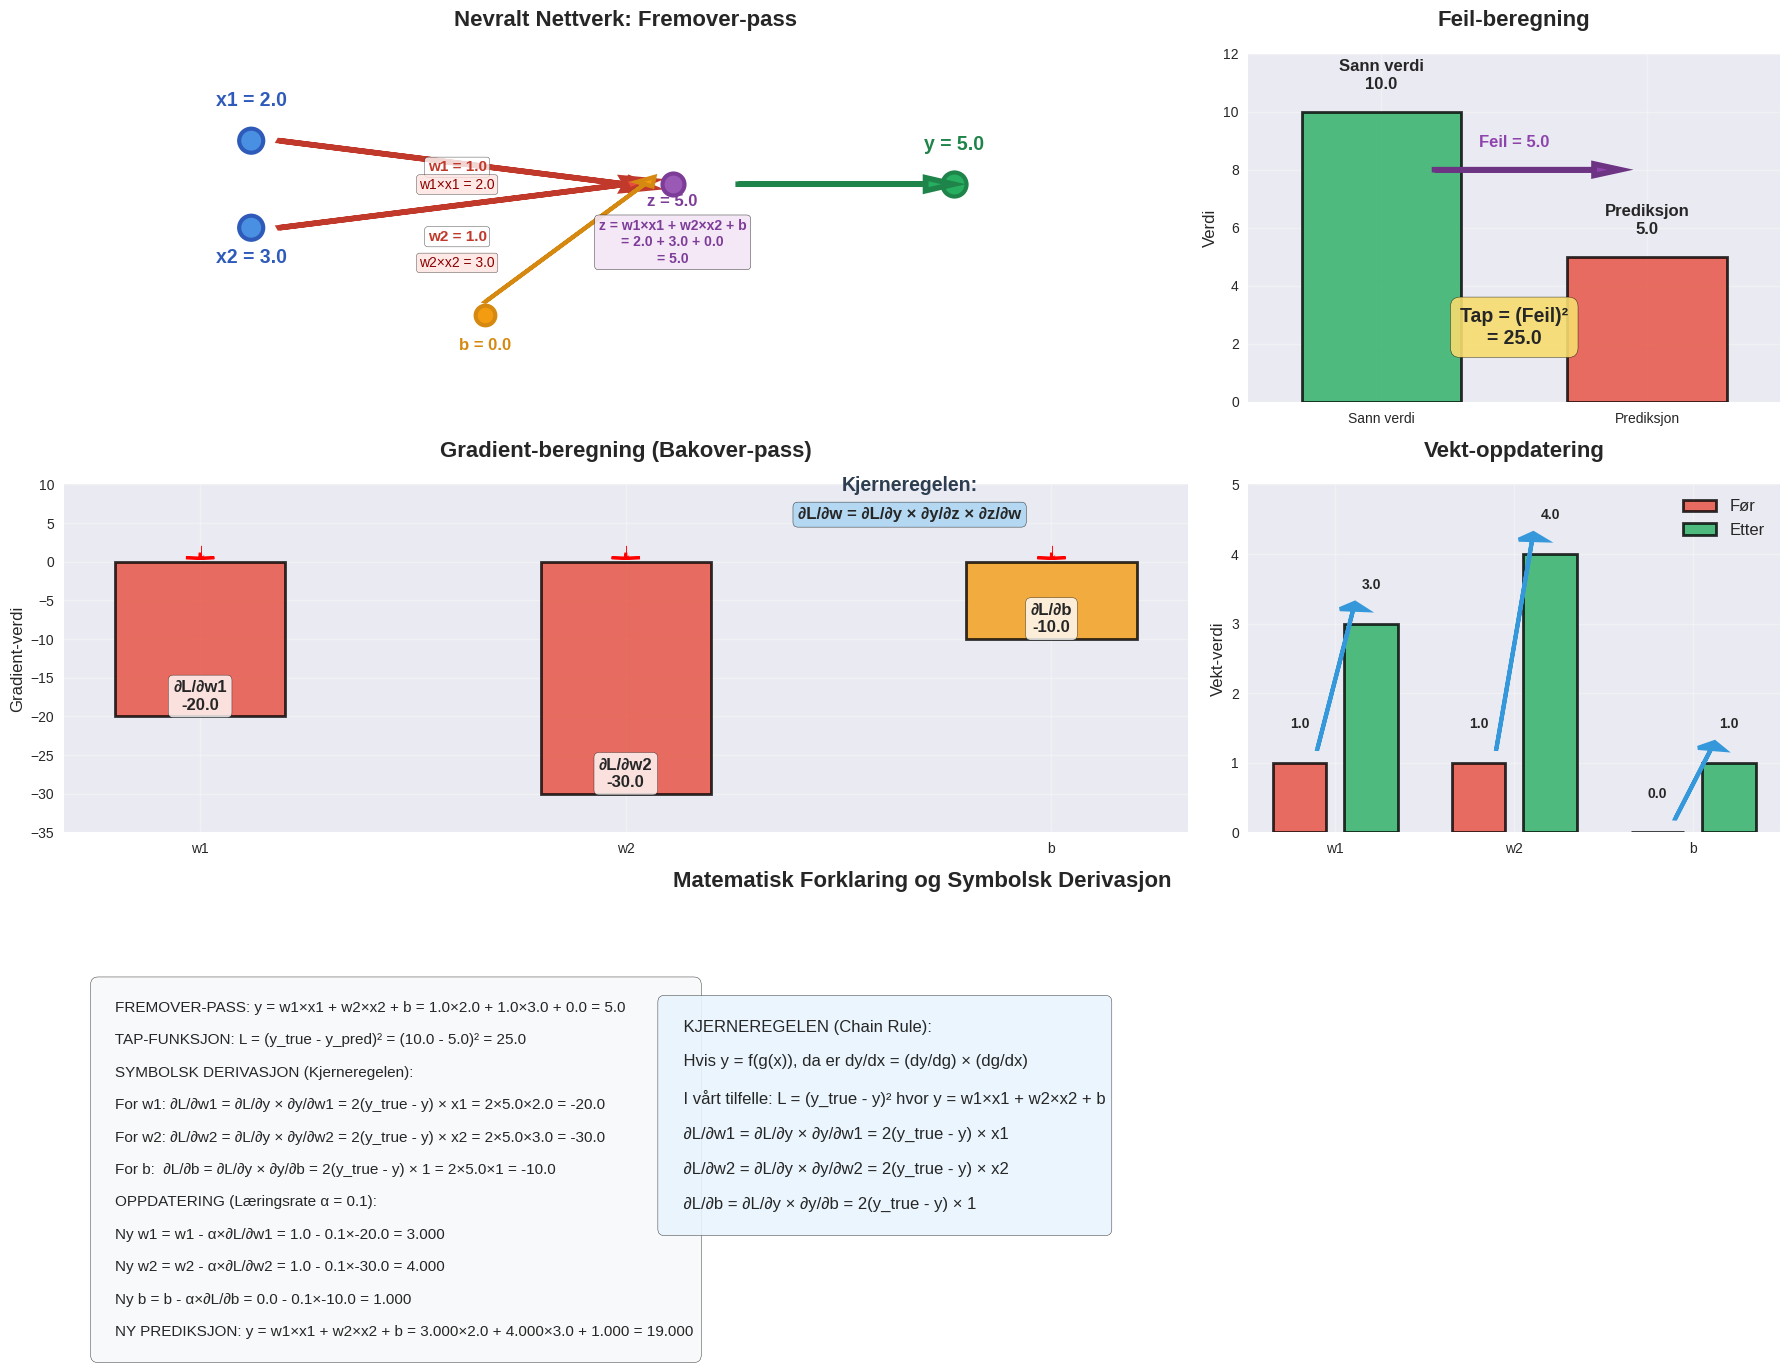

📊 === DETALJERT INFORMASJON ===
Input: x₁ = 2.0, x₂ = 3.0
Sann verdi: 10.0
Initiale vekter: w₁ = 1.0, w₂ = 1.0, b = 0.0

🔄 === FREMOVER-PASS ===
y = w1×x1 + w2×x2 + b = 1.0×2.0 + 1.0×3.0 + 0.0 = 5.0
Tap = (y_true - y_pred)² = (10.0 - 5.0)² = 25.0

⬅️ === BAKOVER-PASS (GRADIENTER) ===
∂L/∂w1 = 2×(y_true - y_pred)×(-x1) = 2×5.0×(-2.0) = -20.0
∂L/∂w2 = 2×(y_true - y_pred)×(-x2) = 2×5.0×(-3.0) = -30.0
∂L/∂b = 2×(y_true - y_pred)×(-1) = 2×5.0×(-1) = -10.0

🔄 === VEKT-OPPDATERING ===
Ny w1 = w1 - α×∂L/∂w1 = 1.0 - 0.1×-20.0 = 3.000
Ny w2 = w2 - α×∂L/∂w2 = 1.0 - 0.1×-30.0 = 4.000
Ny b = b - α×∂L/∂b = 0.0 - 0.1×-10.0 = 1.000

🔄 === NY PREDIKSJON ===
y = w1×x1 + w2×x2 + b = 3.000×2.0 + 4.000×3.0 + 1.000 = 19.000


In [8]:
# Visuell demonstrasjon av backpropagation
def visualize_backpropagation():
    """Forbedret visuell demonstrasjon av backpropagation med mer illustrativ design"""
    
    # Definer en enkel funksjon: y = w1*x1 + w2*x2 + b
    # Tap: L = (y_true - y_pred)²
    
    # Input data
    x1 = torch.tensor(2.0, requires_grad=False)
    x2 = torch.tensor(3.0, requires_grad=False)
    y_true = torch.tensor(10.0, requires_grad=False)
    
    # Modellparametere (trenger gradienter)
    w1 = torch.tensor(1.0, requires_grad=True)
    w2 = torch.tensor(1.0, requires_grad=True)
    b = torch.tensor(0.0, requires_grad=True)
    
    print("🧠 === BACKPROPAGATION DEMONSTRASJON === 🧠")
    print()
    
    # Fremover-pass
    y_pred = w1 * x1 + w2 * x2 + b
    loss = (y_true - y_pred) ** 2
    
    # Bakover-pass (beregn gradienter)
    loss.backward()
    
    # Opprett visualisering med bedre layout
    fig = plt.figure(figsize=(18, 14))
    
    # Opprett grid layout
    gs = fig.add_gridspec(3, 3, height_ratios=[1, 1, 1], width_ratios=[1, 1, 1])
    
    # 1. Nevralt nettverk diagram (forbedret med summeringsnode)
    ax1 = fig.add_subplot(gs[0, :2])
    ax1.set_xlim(0, 14)
    ax1.set_ylim(0, 10)
    ax1.set_title('Nevralt Nettverk: Fremover-pass', fontsize=16, fontweight='bold', pad=20)
    
    # Input lag
    ax1.scatter([2, 2], [7, 5], s=300, c=['#4A90E2', '#4A90E2'], edgecolors='#2E5BBA', linewidth=3)
    ax1.text(2, 7.8, f'x1 = {x1.item()}', ha='center', fontsize=14, fontweight='bold', color='#2E5BBA')
    ax1.text(2, 4.2, f'x2 = {x2.item()}', ha='center', fontsize=14, fontweight='bold', color='#2E5BBA')
    
    # Vekter og piler til summeringsnode (starter i de blå nodene)
    ax1.arrow(2.3, 7, 3.7, -1, head_width=0.3, head_length=0.3, fc='#E74C3C', ec='#C0392B', linewidth=4)
    ax1.arrow(2.3, 5, 3.7, 1, head_width=0.3, head_length=0.3, fc='#E74C3C', ec='#C0392B', linewidth=4)
    ax1.text(4.2, 6.3, f'w1 = {w1.item()}', ha='center', fontsize=11, color='#C0392B', fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.8))
    ax1.text(4.2, 4.7, f'w2 = {w2.item()}', ha='center', fontsize=11, color='#C0392B', fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.8))
    
    # Vis mellomliggende beregninger
    ax1.text(4.2, 5.9, f'w1×x1 = {w1.item()*x1.item():.1f}', ha='center', fontsize=10, color='#8B0000', 
             bbox=dict(boxstyle="round,pad=0.2", facecolor="#FFE4E1", alpha=0.8))
    ax1.text(4.2, 4.1, f'w2×x2 = {w2.item()*x2.item():.1f}', ha='center', fontsize=10, color='#8B0000',
             bbox=dict(boxstyle="round,pad=0.2", facecolor="#FFE4E1", alpha=0.8))
    
    # Summeringsnode
    ax1.scatter([6.5], [6], s=250, c='#9B59B6', edgecolors='#7D3C98', linewidth=3)
    ax1.text(6.5, 6.3, 'Σ', ha='center', fontsize=16, fontweight='bold', color='white')
    ax1.text(6.5, 5.5, f'z = {y_pred.item():.1f}', ha='center', fontsize=12, fontweight='bold', color='#7D3C98')
    
    # Piler fra vekter til summeringsnode (fjernet de korte pilene)
    
    # Bias til summeringsnode (starter i den oransje noden)
    ax1.scatter([4.5], [3], s=200, c='#F39C12', edgecolors='#D68910', linewidth=3)
    ax1.text(4.5, 2.2, f'b = {b.item()}', ha='center', fontsize=12, color='#D68910', fontweight='bold')
    ax1.arrow(4.5, 3.3, 1.7, 2.7, head_width=0.2, head_length=0.2, fc='#F39C12', ec='#D68910', linewidth=3)
    
    # Output fra summeringsnode
    ax1.scatter([9.5], [6], s=300, c='#27AE60', edgecolors='#1E8449', linewidth=3)
    ax1.text(9.5, 6.8, f'y = {y_pred.item():.1f}', ha='center', fontsize=14, fontweight='bold', color='#1E8449')
    ax1.arrow(7.2, 6, 2, 0, head_width=0.3, head_length=0.3, fc='#27AE60', ec='#1E8449', linewidth=4)
    
    # Vis summeringsformel
    ax1.text(6.5, 4.2, f'z = w1×x1 + w2×x2 + b\n= {w1.item()*x1.item():.1f} + {w2.item()*x2.item():.1f} + {b.item():.1f}\n= {y_pred.item():.1f}', 
             ha='center', fontsize=10, color='#7D3C98', fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="#F3E5F5", alpha=0.9))
    
    ax1.set_xlim(0, 12)
    ax1.set_ylim(1, 9)
    ax1.axis('off')
    
    # 2. Feil-beregning (større)
    ax2 = fig.add_subplot(gs[0, 2])
    ax2.set_title('Feil-beregning', fontsize=16, fontweight='bold', pad=20)
    
    # Sann verdi vs prediksjon med bedre design
    bars = ax2.bar([1, 2], [y_true.item(), y_pred.item()], width=0.6, 
                   color=['#27AE60', '#E74C3C'], alpha=0.8, edgecolor='black', linewidth=2)
    ax2.text(1, y_true.item() + 0.8, f'Sann verdi\n{y_true.item()}', ha='center', fontsize=12, fontweight='bold')
    ax2.text(2, y_pred.item() + 0.8, f'Prediksjon\n{y_pred.item():.1f}', ha='center', fontsize=12, fontweight='bold')
    
    # Feil-pil med bedre design
    ax2.arrow(1.2, 8, 0.6, 0, head_width=0.4, head_length=0.1, fc='#8E44AD', ec='#6C3483', linewidth=4)
    ax2.text(1.5, 8.8, f'Feil = {y_true.item() - y_pred.item():.1f}', ha='center', fontsize=12, color='#8E44AD', fontweight='bold')
    
    # Tap med bedre design
    ax2.text(1.5, 2, f'Tap = (Feil)²\n= {loss.item():.1f}', ha='center', fontsize=14, 
             bbox=dict(boxstyle="round,pad=0.5", facecolor="#F7DC6F", alpha=0.9), fontweight='bold')
    
    ax2.set_ylim(0, 12)
    ax2.set_xlim(0.5, 2.5)
    ax2.set_ylabel('Verdi', fontsize=12)
    ax2.set_xticks([1, 2])
    ax2.set_xticklabels(['Sann verdi', 'Prediksjon'])
    ax2.grid(True, alpha=0.3)
    
    # 3. Gradient-beregning (større og mer illustrativ)
    ax3 = fig.add_subplot(gs[1, :2])
    ax3.set_title('Gradient-beregning (Bakover-pass)', fontsize=16, fontweight='bold', pad=20)
    
    # Kjerneregelen med bedre design (flyttet for å unngå kollisjon)
    ax3.text(4, 9.2, 'Kjerneregelen:', ha='center', fontsize=14, fontweight='bold', color='#2C3E50')
    ax3.text(4, 5.5, '∂L/∂w = ∂L/∂y × ∂y/∂z × ∂z/∂w', ha='center', fontsize=12, 
             bbox=dict(boxstyle="round,pad=0.3", facecolor="#AED6F1", alpha=0.9), fontweight='bold')
    
    # Gradienter med bedre visualisering
    gradients = [w1.grad.item(), w2.grad.item(), b.grad.item()]
    labels = ['∂L/∂w1', '∂L/∂w2', '∂L/∂b']
    colors = ['#E74C3C', '#E74C3C', '#F39C12']
    
    # Lag gradient-bars med bedre design
    x_pos = [1.5, 3, 4.5]
    bars = ax3.bar(x_pos, gradients, width=0.6, color=colors, alpha=0.8, 
                   edgecolor='black', linewidth=2)
    
    # Legg til gradient-verdier over bars
    for i, (bar, grad, label) in enumerate(zip(bars, gradients, labels)):
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{label}\n{grad:.1f}', ha='center', va='bottom', fontsize=12, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
    
    # Legg til piler som viser retning
    for i, grad in enumerate(gradients):
        if grad < 0:
            ax3.arrow(x_pos[i], 1, 0, -0.5, head_width=0.1, head_length=0.1, fc='red', ec='red', linewidth=2)
            ax3.text(x_pos[i], 0.5, '↓', ha='center', fontsize=16, color='red', fontweight='bold')
        else:
            ax3.arrow(x_pos[i], 1, 0, 0.5, head_width=0.1, head_length=0.1, fc='green', ec='green', linewidth=2)
            ax3.text(x_pos[i], 1.5, '↑', ha='center', fontsize=16, color='green', fontweight='bold')
    
    ax3.set_ylabel('Gradient-verdi', fontsize=12)
    ax3.set_xticks(x_pos)
    ax3.set_xticklabels(['w1', 'w2', 'b'])
    ax3.grid(True, alpha=0.3)
    ax3.set_ylim(-35, 10)
    
    # 4. Vekt-oppdatering (større og mer illustrativ)
    ax4 = fig.add_subplot(gs[1, 2])
    ax4.set_title('Vekt-oppdatering', fontsize=16, fontweight='bold', pad=20)
    
    # Før og etter med bedre design
    learning_rate = 0.1
    w1_new = w1.item() - learning_rate * w1.grad.item()
    w2_new = w2.item() - learning_rate * w2.grad.item()
    b_new = b.item() - learning_rate * b.grad.item()
    
    x_pos = [1, 2, 3]
    old_weights = [w1.item(), w2.item(), b.item()]
    new_weights = [w1_new, w2_new, b_new]
    labels = ['w1', 'w2', 'b']
    
    # Gamle vekter
    bars1 = ax4.bar([x - 0.2 for x in x_pos], old_weights, width=0.3, 
                    color='#E74C3C', alpha=0.8, label='Før', edgecolor='black', linewidth=2)
    
    # Nye vekter
    bars2 = ax4.bar([x + 0.2 for x in x_pos], new_weights, width=0.3, 
                    color='#27AE60', alpha=0.8, label='Etter', edgecolor='black', linewidth=2)
    
    # Piler som viser endring med bedre design
    for i, (old, new) in enumerate(zip(old_weights, new_weights)):
        if old != new:
            arrow_color = '#3498DB' if new > old else '#E67E22'
            ax4.arrow(x_pos[i] - 0.1, old + 0.2, 0.2, new - old, 
                     head_width=0.15, head_length=0.1, fc=arrow_color, ec=arrow_color, linewidth=3)
    
    # Legg til verdier over bars
    for i, (old, new) in enumerate(zip(old_weights, new_weights)):
        ax4.text(x_pos[i] - 0.2, old + 0.5, f'{old:.1f}', ha='center', fontsize=10, fontweight='bold')
        ax4.text(x_pos[i] + 0.2, new + 0.5, f'{new:.1f}', ha='center', fontsize=10, fontweight='bold')
    
    ax4.set_xticks(x_pos)
    ax4.set_xticklabels(labels)
    ax4.set_ylabel('Vekt-verdi', fontsize=12)
    ax4.legend(fontsize=12)
    ax4.grid(True, alpha=0.3)
    ax4.set_ylim(0, 5)
    
    # 5. Matematisk forklaring 
    ax5 = fig.add_subplot(gs[2, :])
    ax5.axis('off')
    ax5.set_title('Matematisk Forklaring og Symbolsk Derivasjon', fontsize=16, fontweight='bold', pad=20)
    
    # Legg til matematiske formler
    explanation_text = f"""
    FREMOVER-PASS: y = w1×x1 + w2×x2 + b = {w1.item()}×{x1.item()} + {w2.item()}×{x2.item()} + {b.item()} = {y_pred.item():.1f}
    
    TAP-FUNKSJON: L = (y_true - y_pred)² = ({y_true.item()} - {y_pred.item():.1f})² = {loss.item():.1f}
    
    SYMBOLSK DERIVASJON (Kjerneregelen):
    
    For w1: ∂L/∂w1 = ∂L/∂y × ∂y/∂w1 = 2(y_true - y) × x1 = 2×{y_true.item() - y_pred.item():.1f}×{x1.item()} = {w1.grad.item():.1f}
    
    For w2: ∂L/∂w2 = ∂L/∂y × ∂y/∂w2 = 2(y_true - y) × x2 = 2×{y_true.item() - y_pred.item():.1f}×{x2.item()} = {w2.grad.item():.1f}
    
    For b:  ∂L/∂b = ∂L/∂y × ∂y/∂b = 2(y_true - y) × 1 = 2×{y_true.item() - y_pred.item():.1f}×1 = {b.grad.item():.1f}
    
    OPPDATERING (Læringsrate α = 0.1):
    
    Ny w1 = w1 - α×∂L/∂w1 = {w1.item()} - 0.1×{w1.grad.item():.1f} = {w1_new:.3f}

    Ny w2 = w2 - α×∂L/∂w2 = {w2.item()} - 0.1×{w2.grad.item():.1f} = {w2_new:.3f}
    
    Ny b = b - α×∂L/∂b = {b.item()} - 0.1×{b.grad.item():.1f} = {b_new:.3f}
    
    NY PREDIKSJON: y = w1×x1 + w2×x2 + b = {w1_new:.3f}×{x1.item()} + {w2_new:.3f}×{x2.item()} + {b_new:.3f} = {w1_new*x1.item() + w2_new*x2.item() + b_new:.3f}
    """
    
    ax5.text(0.02, 0.8, explanation_text, ha='left', va='top', fontsize=11, 
             bbox=dict(boxstyle="round,pad=0.5", facecolor="#F8F9FA", alpha=0.9))
    
    # Legg til kjerneregelen som egen seksjon (nedre høyre)
    chain_rule_text = """
    KJERNEREGELEN (Chain Rule):
    
    Hvis y = f(g(x)), da er dy/dx = (dy/dg) × (dg/dx)
    
    I vårt tilfelle: L = (y_true - y)² hvor y = w1×x1 + w2×x2 + b
    
    ∂L/∂w1 = ∂L/∂y × ∂y/∂w1 = 2(y_true - y) × x1

    ∂L/∂w2 = ∂L/∂y × ∂y/∂w2 = 2(y_true - y) × x2  
    
    ∂L/∂b = ∂L/∂y × ∂y/∂b = 2(y_true - y) × 1
    """
    
    ax5.text(0.35, 0.75, chain_rule_text, ha='left', va='top', fontsize=12, 
             bbox=dict(boxstyle="round,pad=0.4", facecolor="#E8F4FD", alpha=0.9))
    
    plt.tight_layout()

    # Skriv figuren til en png-fil kalt illustrasjon-av-backpropagation.png
    plt.savefig('./ressurser/illustrasjon-av-backpropagation.png', dpi=300)

    plt.show()
    
    # Print detaljert informasjon
    print("📊 === DETALJERT INFORMASJON ===")
    print(f"Input: x₁ = {x1.item()}, x₂ = {x2.item()}")
    print(f"Sann verdi: {y_true.item()}")
    print(f"Initiale vekter: w₁ = {w1.item()}, w₂ = {w2.item()}, b = {b.item()}")
    print()
    print("🔄 === FREMOVER-PASS ===")
    print(f"y = w1×x1 + w2×x2 + b = {w1.item()}×{x1.item()} + {w2.item()}×{x2.item()} + {b.item()} = {y_pred.item()}")
    print(f"Tap = (y_true - y_pred)² = ({y_true.item()} - {y_pred.item()})² = {loss.item()}")
    print()
    print("⬅️ === BAKOVER-PASS (GRADIENTER) ===")
    print(f"∂L/∂w1 = 2×(y_true - y_pred)×(-x1) = 2×{y_true.item() - y_pred.item()}×(-{x1.item()}) = {w1.grad.item()}")
    print(f"∂L/∂w2 = 2×(y_true - y_pred)×(-x2) = 2×{y_true.item() - y_pred.item()}×(-{x2.item()}) = {w2.grad.item()}")
    print(f"∂L/∂b = 2×(y_true - y_pred)×(-1) = 2×{y_true.item() - y_pred.item()}×(-1) = {b.grad.item()}")
    print()
    print("🔄 === VEKT-OPPDATERING ===")
    print(f"Ny w1 = w1 - α×∂L/∂w1 = {w1.item()} - 0.1×{w1.grad.item()} = {w1_new:.3f}")
    print(f"Ny w2 = w2 - α×∂L/∂w2 = {w2.item()} - 0.1×{w2.grad.item()} = {w2_new:.3f}")
    print(f"Ny b = b - α×∂L/∂b = {b.item()} - 0.1×{b.grad.item()} = {b_new:.3f}")
    print()
    print("🔄 === NY PREDIKSJON ===")
    print(f"y = w1×x1 + w2×x2 + b = {w1_new:.3f}×{x1.item()} + {w2_new:.3f}×{x2.item()} + {b_new:.3f} = {w1_new*x1.item() + w2_new*x2.item() + b_new:.3f}")

# Kjør den forbedrede visuelle demonstrasjonen
visualize_backpropagation()


## 🤔 Hvorfor Økte Feilen etter Oppdatering?

Du har lagt merke til noe viktig: **Feilen økte fra 5.0 til 9.0** etter oppdatering! Dette skjer av flere grunner:

### 📈 **Hva Skjedde:**
- **Før oppdatering**: Prediksjon = 5.0, Feil = |10.0 - 5.0| = 5.0
- **Etter oppdatering**: Prediksjon = 19.0, Feil = |10.0 - 19.0| = 9.0

### 🔍 **Hvorfor Dette Skjer:**

#### 1. **For Høy Læringsrate (α = 0.1)**
- Læringsraten er **for stor** for dette problemet
- Nettverket tar **for store steg** og "hopper over" det optimale punktet
- Som å gå forbi dalen når du skal ned et fjell

#### 2. **Gradienter er Negative**
- Alle gradienter er negative: w1=-20, w2=-30, b=-10
- Dette betyr at vektene må **økes** for å redusere feilen
- Men vi økte dem **for mye** i ett steg

#### 3. **Ikke-Lineært Problem**
- Selv om funksjonen ser lineær ut, er optimaliseringen kompleks
- Store endringer kan føre til **oscillering** rundt optimum

### 🛠️ **Hvordan Fikse Dette:**

#### **Reduser Læringsraten:**
- Prøv α = 0.01 i stedet for 0.1
- Mindre steg = mer stabil læring

#### **Iterativ Oppdatering:**
- Gjenta prosessen flere ganger med mindre steg
- Hver iterasjon vil bringe oss nærmere optimum

#### **Adaptive Læringsrater:**
- Moderne algoritmer justerer læringsraten automatisk
- F.eks. Adam, RMSprop, AdaGrad

### 🎯 **Læring:**
Dette demonstrerer at **læring i AI ikke alltid er lineær** - noen ganger må vi "gå tilbake" for å finne den beste løsningen.

**I neste iterasjon** ville nettverket justere seg i motsatt retning og gradvis finne det optimale punktet.


_Forskjellen mellom gradient nedstigning og backpropagation_

### Hva er da forskjellen mellom Gradient Nedstigning (omtalt tidligere) og Backpropagation

#### 🎯 **Gradient Nedstigning: "Hvor skal vi gå?"**

**Gradient nedstigning** er **optimaliseringsalgoritmen** - den bestemmer **hvilken retning** vi skal gå for å finne det beste resultatet.

**Hva den gjør:**
- Beregner **retningen** med størst stigning (gradienten)
- Går i **motsatt retning** for å finne minimum
- Oppdaterer **alle parametere** samtidig
- **Formel**: θ ← θ - α∇L(θ)

**Geografisk analogi:**
Som å være på et fjell og finne dalen ved å følge terrenget nedover. Du vet ikke nøyaktig hvor dalen er, men du følger retningen som går nedover.

#### ⚡ **Backpropagation: "Hvordan beregner vi retningen?"**

**Backpropagation** er **beregningsmetoden** - den finner ut **hvordan** hver vekt påvirker den totale feilen.

**Hva den gjør:**
- Beregner **gradienter** for hver vekt i nettverket
- Bruker **kjerneregelen** fra kalkulus
- "Går bakover" gjennom nettverket
- **Formel**: ∂L/∂w = ∂L/∂y × ∂y/∂z × ∂z/∂w

**Medisinsk analogi:**
Som å analysere hvilke faktorer som førte til en feil diagnose. Du går systematisk gjennom hver del av diagnostikken for å finne ut hva som må endres.

#### 🔄 **Sammenhengen: To Sider av Samme Mynt**

**Backpropagation** → **Gradient Nedstigning**
1. **Backpropagation** beregner gradientene (hvor mye hver vekt påvirker feilen)
2. **Gradient nedstigning** bruker disse gradientene for å oppdatere vektene

**Praktisk eksempel:**
- **Backpropagation**: "Vekt w1 påvirker feilen med -20, w2 med -30"
- **Gradient nedstigning**: "La oss øke w1 med 2.0 og w2 med 3.0 for å redusere feilen"

#### 📊 **Visuell Sammenligning**

| Aspekt | Gradient Nedstigning | Backpropagation |
|--------|---------------------|-----------------|
| **Hovedoppgave** | Optimalisering | Beregning av gradienter |
| **Spørsmål** | "Hvor skal vi gå?" | "Hvordan beregner vi retningen?" |
| **Input** | Gradienter | Nettverksarkitektur + feil |
| **Output** | Oppdaterte vekter | Gradienter for hver vekt |
| **Tidsskala** | Hver iterasjon | Hver iterasjon |
| **Matematikk** | Enkel subtraksjon | Kompleks derivasjon |

#### 🧠 **I Praksis: Hvordan de Arbeider Sammen**

**Trinn 1: Fremover-pass**
- Nettverket gjør en prediksjon
- Vi beregner feilen

**Trinn 2: Backpropagation**
- Beregner hvordan hver vekt påvirker feilen
- Gir oss gradientene

**Trinn 3: Gradient nedstigning**
- Bruker gradientene for å oppdatere vektene
- Går i retning som reduserer feilen

**Trinn 4: Gjenta**
- Fortsett til nettverket har lært

#### 🎯 **Hvorfor Dette er Viktig for Helsepersonell**

**Forståelse av AI-grenser:**
- AI "lærer" ikke som mennesker
- Det er matematiske algoritmer som optimaliserer parametere
- **Backpropagation** er ikke biologisk plausibel

**Klinisk relevans:**
- Hjelper å forstå hvorfor AI kan gjøre feil
- Viktig for å vurdere AI-systemers pålitelighet
- Betydelig for implementering av AI i klinisk praksis

#### 📚 **Oppsummering**

**Gradient nedstigning** og **backpropagation** er to deler av samme læringsprosess:

- **Backpropagation** = "Hvordan beregner vi retningen?"
- **Gradient nedstigning** = "Hvor skal vi gå?"

Uten backpropagation ville vi ikke vite hvilken retning å gå. Uten gradient nedstigning ville vi ikke kunne oppdatere vektene. Sammen lar de nevrale nettverk lære fra data og forbedre sine prediksjoner.

_Jeg har hørt om batchvis oppdatering, hvordan kommer dette inn i spill?_

Batchvis oppdatering er en viktig teknikk i maskinlæring som påvirker både gradient nedstigning og backpropagation. 

### 🍽️ **Batchvis Oppdatering: Hva er det?**

**Batch** = en gruppe eksempler (datapunkter, instanser, delmengder av treningsdata) som behandles samtidig<br>
**Batchvis oppdatering** = oppdaterer vektene basert på flere eksempler av gangen, ikke bare ett

#### 📊 **Tre Typer Oppdatering**

##### 1. **Stokastisk Gradient Nedstigning (SGD)**
- **Batch størrelse**: 1
- **Hvordan**: Oppdaterer vekter etter hvert eksempel
- **Fordel**: Rask oppdatering, kan lære fra nye data fort
- **Ulempe**: Ustabil, kan "hoppe rundt" i parameterrommet

##### 2. **Batch Gradient Nedstigning**
- **Batch størrelse**: Hele datasettet
- **Hvordan**: Oppdaterer vekter etter å ha sett alle eksempler
- **Fordel**: Stabil, konvergerer til globalt minimum
- **Ulempe**: Tregt, krever mye minne

##### 3. **Mini-batch Gradient Nedstigning** ⭐
- **Batch størrelse**: 32-256 eksempler (typisk)
- **Hvordan**: Oppdaterer vekter etter hver mini-batch
- **Fordel**: Balanserer stabilitet og hastighet
- **Ulempe**: Krever tuning av batch størrelse

#### 🔄 **Hvordan Batchvis Oppdatering Fungerer**

##### **Fremover-pass for en Batch:**
```python
# For hver eksempel i batchen
for i in range(batch_size):
    prediction[i] = model(input[i])
    loss[i] = criterion(prediction[i], target[i])

# Gjennomsnittlig tap for batchen
batch_loss = torch.mean(loss)
```

##### **Backpropagation for en Batch:**
```python
# Beregn gradienter for hele batchen
batch_loss.backward()

# Gradientene er nå gjennomsnittet over alle eksempler i batchen
# ∂L/∂w = (1/batch_size) * Σ(∂L_i/∂w)
```

##### **Gradient Nedstigning med Batch:**
```python
# Oppdater vekter basert på gjennomsnittlige gradienter
optimizer.step()
```

#### 📈 **Visuell Sammenligning**

Forskjellen kan illustreres med et praktisk eksempel:

```python
# Eksempel: Medisinsk diagnose med forskjellige batch størrelser

# SGD (batch_size = 1)
for patient in patients:
    prediction = model(patient.features)
    loss = criterion(prediction, patient.diagnosis)
    loss.backward()  # Oppdaterer vekter
    optimizer.step()

# Mini-batch (batch_size = 32)
for batch in batches_of_32_patients:
    predictions = model(batch.features)
    losses = criterion(predictions, batch.diagnoses)
    batch_loss = torch.mean(losses)
    batch_loss.backward()  # Oppdaterer vekter
    optimizer.step()

# Batch (batch_size = all_patients)
all_predictions = model(all_patients.features)
all_losses = criterion(all_predictions, all_patients.diagnoses)
total_loss = torch.mean(all_losses)
total_loss.backward()  # Oppdaterer vekter
optimizer.step()
```

#### 🎯 **Hvorfor Batchvis Oppdatering er Viktig**

##### **1. Stabilitet**
- **Større batch** = mer stabil læring
- **Mindre batch** = mer variasjon, men kan unngå lokale minima

##### **2. Hastighet**
- **Større batch** = færre oppdateringer, men tregere per oppdatering
- **Mindre batch** = flere oppdateringer, men raskere per oppdatering

##### **3. Minnebruk**
- **Større batch** = krever mer minne
- **Mindre batch** = krever mindre minne

##### **4. Generalisering** (*)
- **Større batch** = kan generalisere bedre
- **Mindre batch** = kan unngå overtilpasning

(*) Dette ser motstridende ut ved første øyekast, men:


### 🤔 **Tilsynelatende Motstrid: Generalisering vs Overtilpasning**

#### 📊 **Det Komplekse Forholdet mellom Batch Størrelse og Generalisering**

##### **1. Større Batch = Bedre Generalisering (generelt)**
**Hvorfor:**
- **Mer stabil læring**: Færre "hopp" i parameterrommet
- **Bedre gradient-estimater**: Gjennomsnitt over flere eksempler
- **Mindre støy**: Enkelt eksempler påvirker mindre
- **Mer konsistent**: Lærer fra representativt utvalg

**Medisinsk eksempel:**
- Med batch størrelse 128 lærer modellen fra 128 pasienter samtidig
- Enkel pasient med uvanlige symptomer påvirker læringen mindre
- Modellen får et mer balansert bilde av sykdommen

##### **2. Mindre Batch = Kan Unngå Overfitting (i spesifikke tilfeller)**
**Hvorfor:**
- **Mer støy**: Kan "hoppe ut" av lokale minima
- **Bedre utforskning**: Undersøker parameterrommet mer
- **Mindre risiko for å "låse seg fast"**: Ikke overtilpasser til spesifikke mønstre

**Medisinsk eksempel:**
- Med batch størrelse 1 kan modellen lære fra hver enkelt pasient
- Kan oppdage sjeldne men viktige mønstre
- Unngår å overtilpasse til vanlige tilfeller

#### 🎯 **Den Viktige Distinksjonen**

##### **Generalisering ≠ Overfitting-avverging**

**Generalisering** = Hvor godt modellen fungerer på nye data
**Overfitting-avverging** = Hvor godt modellen unngår å overtilpasse seg

#### 📈 **Den U-formede Kurven**

```python
# Konseptuell illustrasjon av forholdet
batch_sizes = [1, 8, 32, 64, 128, 256, 512, 1024]
generalization_scores = [0.6, 0.7, 0.85, 0.9, 0.88, 0.85, 0.82, 0.8]
overfitting_risk = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9]

# Optimal batch størrelse er der generalisering er høyest
# og overfitting-risiko er lavest
```

#### 🔍 **Når Gjelder Hvilken Regel?**

##### **Større Batch for Bedre Generalisering:**
- **Store, diverse datasett**
- **Stabile, veldefinerte problemer**
- **Når du har nok data**
- **Produksjonsmodeller**

##### **Mindre Batch for Overfitting-avverging:**
- **Små datasett**
- **Komplekse, støyete problemer**
- **Når du har lite data**
- **Forskningsmodeller**

#### 🏥 **Medisinsk Eksempel: Hjerte-kar-sykdom**

##### **Scenario 1: Stor, representativ database**
```python
# 100,000 pasienter, velbalansert
# Anbefaling: Større batch (128-256)
# Grunn: Bedre generalisering, mindre støy
```

##### **Scenario 2: Liten, sjeldne sykdommer**
```python
# 1,000 pasienter, sjeldne tilfeller
# Anbefaling: Mindre batch (16-32)
# Grunn: Unngå overtilpasning, utforsk sjeldne mønstre
```

#### 📊 **Praktisk Rådgivning**

##### **Start med Medium Batch:**
```python
# Start med batch størrelse 32-64
# Monitorér både generalisering og overtilpasning
# Tilpass basert på resultater
```

##### **Indikatorer for Optimal Batch Størrelse:**
- **Høy test-accuracy** (god generalisering)
- **Lite gap mellom trening/test accuracy** (lav overfitting)
- **Stabil loss-kurve** (god konvergens)

#### 🎯 **Oppdatert Tabell**

| Batch Størrelse | Generalisering | Overfitting-risiko | Anbefaling |
|----------------|----------------|-------------------|------------|
| **1-8** | Lav | Lav | Små datasett, sjeldne sykdommer |
| **32-64** | Høy | Medium | **Start her** |
| **128-256** | Høy | Medium | Store datasett, produksjon |
| **512+** | Medium | Høy | Veldig store datasett |

#### 📚 **Konklusjon**

Løsningen på denne tilsynelatende motstriden er: 

1. **Begge utsagnene er sanne** - men i forskjellige kontekster
2. **Generalisering og overfitting-avverging** er relaterte men forskjellige konsepter
3. **Optimal batch størrelse** balanserer begge faktorene
4. **Kontekst er viktig** - datasett størrelse, problem-kompleksitet, osv.

**Praktisk råd:** Start med batch størrelse 32-64, og tilpass basert på hvordan modellen presterer på både trenings- og testdata. <br>
Ofte setter ogs størreslen på **tilgjengelig GPU-minne** (e.g. VRAM: 8 GB, 16 GB, 32 GB) en beskrankning på batch-størrelse (e.g. batch-størrelser 2, 4, 8)




#### 🏥 **Medisinsk Eksempel: Hjerte-kar-sykdom Prediksjon**

```python
# Praktisk eksempel med PyTorch
class MedicalDiagnosisNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, num_classes)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Forskjellige batch størrelser
batch_sizes = [1, 32, 128, 512]

for batch_size in batch_sizes:
    print(f"\n=== Batch størrelse: {batch_size} ===")
    
    # Opprett DataLoader med ønsket batch størrelse
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    
    for epoch in range(10):
        for batch_features, batch_targets in dataloader:
            # Fremover-pass
            predictions = model(batch_features)
            loss = criterion(predictions, batch_targets)
            
            # Backpropagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
        print(f"Epoke {epoch+1}: Loss = {loss.item():.4f}")
```

#### 📊 **Sammenligning av Batch Størrelser**

| Batch Størrelse | Stabilitet | Hastighet | Minne | Generalisering |
|----------------|------------|-----------|-------|----------------|
| **1 (SGD)** | Lav | Høy | Lav | Varierende |
| **32-64** | Medium | Høy | Medium | God |
| **128-256** | Høy | Medium | Høy | God |
| **Hele datasettet** | Høyest | Lav | Høyest | Best |

#### 🎯 **Praktiske Anbefalinger for Medisinsk AI**

##### **Start med Mini-batch:**
- **Batch størrelse**: 32-64
- **Grunn**: Balanserer stabilitet og hastighet
- **Tilpas**: Øk hvis du har mye minne, mink hvis du har lite

##### **Tilpass til datasett:**
- **Store datasett**: Bruk større batch
- **Små datasett**: Bruk mindre batch
- **Ubalanserte datasett**: Vurder weighted sampling

##### **Monitorér trening:**
- **Stabil loss**: Batch størrelsen fungerer
- **Oscillerende loss**: Prøv større batch
- **Treig trening**: Prøv mindre batch

#### 🔍 **Avanserte Teknikker**

##### **1. Gradient Accumulation**
```python
# Simulerer større batch når du har lite minne
accumulation_steps = 4
for i, (features, targets) in enumerate(dataloader):
    predictions = model(features)
    loss = criterion(predictions, targets) / accumulation_steps
    loss.backward()
    
    if (i + 1) % accumulation_steps == 0:
        optimizer.step()
        optimizer.zero_grad()
```

##### **2. Adaptive Batch Størrelse**
```python
# Øk batch størrelse når loss stabiliseres
if loss_has_stabilized:
    batch_size *= 2
    dataloader = DataLoader(dataset, batch_size=batch_size)
```

#### 📚 **Oppsummering**

**Batchvis oppdatering** påvirker både gradient nedstigning og backpropagation:

- **Backpropagation**: Beregner gradienter for hele batchen samtidig
- **Gradient nedstigning**: Oppdaterer vekter basert på gjennomsnittlige gradienter

**Hovedfordeler:**
- **Stabilitet**: Mer stabil læring
- **Effektivitet**: Bedre utnyttelse av moderne hardware
- **Generalisering**: Bedre generalisering til nye data

**For medisinsk AI:**
- Start med batch størrelse 32-64
- Tilpass basert på datasett og hardware (GPU VRAM)
- Monitorér trening for å finne optimal størrelse

Dette er en av de viktigste hyperparametrene å tune når du trener nevrale nettverk for medisinske applikasjoner.

-----

## Oppsummering og Veien Videre

### Hva vi har lært

1. **Gradient Nedstigning** er kjernen i læring - vi finner minimum ved å følge gradienten
2. **Backpropagation** beregner gradienter automatisk ved hjelp av kjerneregelen
3. **Trening** innebærer å iterativt oppdatere vekter for å minimere feil
4. **Overtilpasning** er en stor utfordring som kan løses med regularisering*
5. **Generalisering** er målet - modellen skal fungere på nye data

(*) **Regularisering** er teknikker som legger til "straff" for komplekse modeller, slik at de ikke lærer for spesifikt på treningsdataene og kan generalisere bedre på nye, usette data.

### Praktiske tips for Medisinsk AI

- **Start enkelt**: Begynn med enkle modeller først
- **Valider grundig**: Bruk cross-validation og holdout-sett
- **Vær skeptisk**: Test modellen på nye data før implementering
- **Dokumenter alt**: Hold styr på hyperparametere og resultater
- **Samarbeid**: Inkluder klinikere i utviklingsprosessen

### Neste Steg: Klassifikasjon av UCI Heart Disease dataset med dyplæringsmodell

I neste del (01c_UCI_heart_disease_klassifikasjon.ipynb) skal vi utforske:
1. **Nedlasting og preprosessering** av reelle UCI Heart Disease data
2. **Eksplorativ dataanalyse** med visualiseringer
3. **Forbedret nevralt nettverk** med batch normalization og dropout
4. **Detaljert trening** med adaptive læringsrate
5. **Omfattende evaluering** med forvirringsmatrise, ROC-kurve og ytelses-metrikker
6. **Feature importance analyse** for å forstå hvilke faktorer som er viktigst
7. **Klinisk tolkning** og praktiske anbefalinger

### Refleksjonsspørsmål

1. Hvorfor er overtilpasning spesielt farlig i medisinsk AI?
2. Hvordan kan vi sikre at en medisinsk AI-modell generaliserer godt?
3. Hvilke etiske utfordringer ser du med automatisk medisinsk diagnostikk?
4. Hvordan kan vi kombinere menneskelig ekspertise med maskinlæring?
